<a href="https://colab.research.google.com/github/rajat21397/Turf-Rental-Company-Buisness-Case-Study/blob/main/MTP_PHASE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sklearn as sk
import sklearn.metrics
import sklearn.model_selection
import sklearn.svm

In [ ]:
# constants
PARA_JOBS = 8
NUM_SEARCH_PARAMS = 10

In [ ]:
def custom_huber_loss(y_true, y_pred): # as implemented in https://github.com/astroML/astroML
    delta = 1.0
    t = abs((y_true - y_pred))
    flag = t > delta
    ave=np.mean(np.array(y_true))
    return - (np.sum((~flag) * (0.5 * t * t) + (flag) * delta * (t - 0.5 * delta))
        /np.sum(0.5*(y_true-ave)*(y_true-ave)))

In [ ]:
# read training and test dataset
[X_train, X_test, y_train, y_test] = pickle.load(open('raw_data.pickle', 'rb'))

In [ ]:

x=pd.concat([X_test,X_train],axis=0)
y=pd.concat([y_test,y_train],axis=0)

In [ ]:
# df=pd.concat([y_train,X_train],axis=1)
df=pd.concat([y,x],axis=1)


In [ ]:
df.columns

Index([                             0,                  'MP_band_gap',
                 'delta_pauling_eneg',                   'MP_density',
       'MP_formation_energy_per_atom', 'min_PYMATGEN_oxidation_state',
              'min_PYMATGEN_madelung',        'max_PYMATGEN_madelung',
       'var_PYMATGEN_oxidation_state',                   'OneHot_Cs+',
                          'OneHot_K+',                   'OneHot_Rb+',
                        'OneHot_Ba2+',                   'OneHot_Na+',
                        'OneHot_Sr2+',                   'OneHot_Li+',
                        'OneHot_Ca2+',                  'OneHot_La3+',
                         'OneHot_Y3+',                  'OneHot_Hf4+',
                        'OneHot_Mg2+',                  'OneHot_Zr4+',
                        'OneHot_Sc3+',                  'OneHot_Ta5+',
                        'OneHot_Ti4+',                  'OneHot_Mn2+',
                        'OneHot_Mn4+',                  'OneHot_Be2+',
      

In [ ]:
df1=df.drop(['OneHot_Cs+',
                          'OneHot_K+',                   'OneHot_Rb+',
                        'OneHot_Ba2+',                   'OneHot_Na+',
                        'OneHot_Sr2+',                   'OneHot_Li+',
                        'OneHot_Ca2+',                  'OneHot_La3+',
                         'OneHot_Y3+',                  'OneHot_Hf4+',
                        'OneHot_Mg2+',                  'OneHot_Zr4+',
                        'OneHot_Sc3+',                  'OneHot_Ta5+',
                        'OneHot_Ti4+',                  'OneHot_Mn2+',
                        'OneHot_Mn4+',                  'OneHot_Be2+',
                        'OneHot_Nb3+',                  'OneHot_Nb5+',
                        'OneHot_Al3+',                   'OneHot_Tl+',
                        'OneHot_Tl3+',                   'OneHot_V2+',
                        'OneHot_Zn2+',                  'OneHot_Cr3+',
                        'OneHot_Cd2+',                  'OneHot_In3+',
                        'OneHot_Ga2+',                  'OneHot_Ga3+',
                        'OneHot_Fe2+',                  'OneHot_Fe3+',
                         'OneHot_Cu+',                  'OneHot_Si4+',
                        'OneHot_Ni2+',                   'OneHot_Ag+',
                        'OneHot_Sn2+',                  'OneHot_Sn4+',
                        'OneHot_Hg2+',                  'OneHot_Ge2+',
                        'OneHot_Ge4+',                  'OneHot_Bi3-',
                        'OneHot_Bi3+',                  'OneHot_Bi5+',
                         'OneHot_B3+',                  'OneHot_Sb3-',
                        'OneHot_Sb3+',                  'OneHot_Sb5+',
                        'OneHot_Te2-',                   'OneHot_Te-',
                        'OneHot_Te4+',                  'OneHot_Te6+',
                        'OneHot_As3-',                  'OneHot_As3+',
                        'OneHot_As5+',                   'OneHot_P3-',
                          'OneHot_P-',                   'OneHot_P5+',
                          'OneHot_H-',                    'OneHot_H+',
                        'OneHot_Pd2+',                  'OneHot_Pd4+',
                        'OneHot_Ru2+',                  'OneHot_Rh3+',
                        'OneHot_Pb2+',                  'OneHot_Pb4+',
                         'OneHot_W6+',                   'OneHot_C4-',
                         'OneHot_C4+',                  'OneHot_Se2-',
                         'OneHot_Se-',                  'OneHot_Se4+',
                         'OneHot_S2-',                    'OneHot_S-',
                         'OneHot_S6+',                    'OneHot_I-',
                         'OneHot_Br-',                  'OneHot_Br5+',
                         'OneHot_N3-',                   'OneHot_N5+',
                         'OneHot_Cl-',                   'OneHot_O2-',
                          'OneHot_O-',                    'OneHot_F-'],axis=1)

In [ ]:
df1.head(5)

0  MP_band_gap  delta_pauling_eneg  MP_density  \
1170  5.868289    -0.064016           -0.806723    0.014251   
942   3.493347     0.265610            0.554622    0.727174   
1183  4.017911     0.554675           -0.873950   -0.668243   
31    2.665381     1.812734            1.008403    0.550917   
142   4.021912    -0.265443            0.369748    0.305440   

      MP_formation_energy_per_atom  min_PYMATGEN_oxidation_state  \
1170                      0.278279                           0.0   
942                      -0.484816                           0.0   
1183                      0.641397                          -1.0   
31                       -1.314435                           1.0   
142                      -0.242856                           1.0   

      min_PYMATGEN_madelung  max_PYMATGEN_madelung  \
1170               0.375421              -1.156563   
942               -1.510986              -1.232008   
1183              -2.240887              -4.819124   
31                 0.436891               0.043212   
142               -0.649985              -0.089339   

      var_PYMATGEN_oxidation_state  
1170                     -0.162003  
942                       1.068667  
1183                      2.518409  
31                       -0.729013  
142                      -0.331370

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x)
#scaled_ds = pd.DataFrame(scaler.transform(x),columns= x.columns )
#print("All features are now scaled")

In [ ]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.226,random_state=28)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(x_scaled,y,test_size=0.226)

In [ ]:
df.head()

0  MP_band_gap  delta_pauling_eneg  MP_density  \
1170  5.868289    -0.064016           -0.806723    0.014251   
942   3.493347     0.265610            0.554622    0.727174   
1183  4.017911     0.554675           -0.873950   -0.668243   
31    2.665381     1.812734            1.008403    0.550917   
142   4.021912    -0.265443            0.369748    0.305440   

      MP_formation_energy_per_atom  min_PYMATGEN_oxidation_state  \
1170                      0.278279                           0.0   
942                      -0.484816                           0.0   
1183                      0.641397                          -1.0   
31                       -1.314435                           1.0   
142                      -0.242856                           1.0   

      min_PYMATGEN_madelung  max_PYMATGEN_madelung  \
1170               0.375421              -1.156563   
942               -1.510986              -1.232008   
1183              -2.240887              -4.819124   
31                 0.436891               0.043212   
142               -0.649985              -0.089339   

      var_PYMATGEN_oxidation_state  OneHot_Cs+  ...  OneHot_S6+  OneHot_I-  \
1170                     -0.162003         0.0  ...         0.0        0.0   
942                       1.068667         0.0  ...         0.0        0.0   
1183                      2.518409         0.0  ...         0.0        0.0   
31                       -0.729013         0.0  ...         0.0        0.0   
142                      -0.331370         0.0  ...         0.0        0.0   

      OneHot_Br-  OneHot_Br5+  OneHot_N3-  OneHot_N5+  OneHot_Cl-  OneHot_O2-  \
1170         0.0          0.0        0.00         0.0         0.0    0.000000   
942          0.0          0.0        0.00         0.0         0.0    1.333333   
1183         0.0          0.0        1.25         0.0         0.0    0.000000   
31           0.0          0.0        0.00         0.0         0.0    0.000000   
142          0.0          0.0        0.00         0.0         0.0    0.000000   

      OneHot_O-  OneHot_F-  
1170        0.0        0.0  
942         0.0        0.0  
1183        0.0        0.0  
31          0.0        1.2  
142         0.0        1.5  

[5 rows x 94 columns]

In [ ]:
X_train1

MP_band_gap  delta_pauling_eneg  MP_density  \
484      0.417745           -0.109244   -1.195732   
1144    -0.382071           -0.294118    3.085163   
589      1.942605            1.067227   -0.222082   
474      2.343160            0.932773   -0.084298   
305     -0.419458           -0.949580    0.779215   
...           ...                 ...         ...   
999      2.179287            1.067227   -0.530323   
1204    -0.232986            0.554622    1.005046   
1059     0.388337           -0.537815   -0.341282   
1143     0.557933            0.369748    0.410140   
1251     0.363524            0.613445   -0.533633   

      MP_formation_energy_per_atom  min_PYMATGEN_oxidation_state  \
484                       0.334308                           0.0   
1144                      0.577140                           0.0   
589                      -1.252988                           1.0   
474                      -1.497106                           1.0   
305                       0.785865                           1.0   
...                            ...                           ...   
999                      -1.165860                           1.0   
1204                     -1.152345                           0.0   
1059                      0.582655                           1.0   
1143                     -0.617289                           1.0   
1251                      0.062622                           0.0   

      min_PYMATGEN_madelung  max_PYMATGEN_madelung  \
484                0.394970               0.144970   
1144               0.369281              -1.184379   
589               -0.158558               0.055220   
474               -0.012356              -0.024018   
305                0.506924               0.111395   
...                     ...                    ...   
999               -0.138734               0.045268   
1204              -0.918317              -1.096353   
1059               0.400571               0.064155   
1143               0.353074              -0.052147   
1251              -2.297083               0.049308   

      var_PYMATGEN_oxidation_state  OneHot_Cs+  OneHot_K+  ...  OneHot_S6+  \
484                      -0.497054         0.0   0.666667  ...         0.0   
1144                     -0.079529         0.0   0.000000  ...         0.0   
589                      -0.543446         0.0   0.000000  ...         0.0   
474                      -0.602490         0.0   0.000000  ...         0.0   
305                      -0.806333         0.0   0.000000  ...         0.0   
...                            ...         ...        ...  ...         ...   
999                      -0.729013         0.0   0.400000  ...         0.0   
1204                      0.662739         0.0   0.000000  ...         0.0   
1059                     -0.686839         0.0   0.000000  ...         0.0   
1143                     -0.686839         0.0   0.000000  ...         0.0   
1251                      0.765832         0.0   0.000000  ...         0.0   

      OneHot_I-  OneHot_Br-  OneHot_Br5+  OneHot_N3-  OneHot_N5+  OneHot_Cl-  \
484    0.000000         0.0          0.0         0.0         0.0         0.0   
1144   0.000000         0.0          0.0         0.0         0.0         0.0   
589    0.000000         0.0          0.0         0.0         0.0         0.0   
474    0.000000         0.0          0.0         0.0         0.0         0.0   
305    1.142857         0.0          0.0         0.0         0.0         0.0   
...         ...         ...          ...         ...         ...         ...   
999    0.000000         0.0          0.0         0.0         0.0         0.0   
1204   0.000000         0.0          0.0         0.0         0.0         0.0   
1059   0.000000         0.0          0.0         0.0         0.0         0.0   
1143   0.000000         0.0          0.0         0.0         0.0         0.0   
1251   0.000000         0.0          0.0         0.0         0.4         0.0   

     

In [ ]:
y_train1.max()

29.344529514088276

Text(0.5, 1.0, 'Simple linear regression')

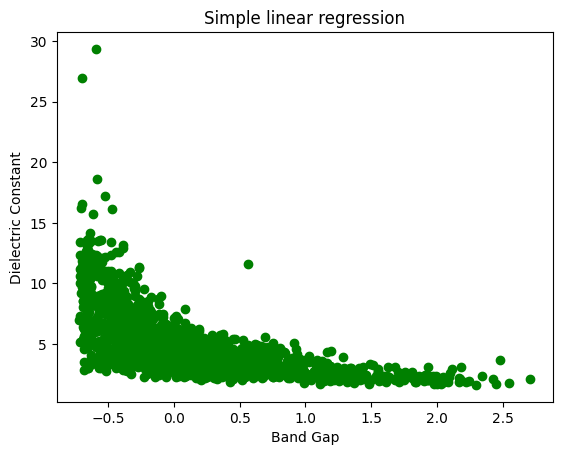

In [ ]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['MP_band_gap'],y,color='green')
plt.ylabel('Dielectric Constant')
plt.xlabel('Band Gap')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

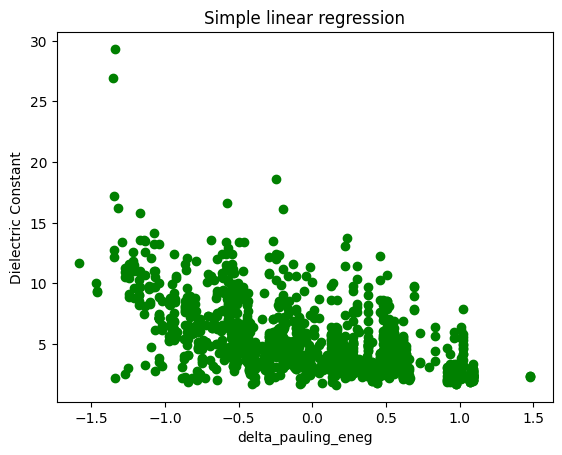

In [ ]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(df['delta_pauling_eneg'],y,color='green')
plt.ylabel('Dielectric Constant')
plt.xlabel('delta_pauling_eneg')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

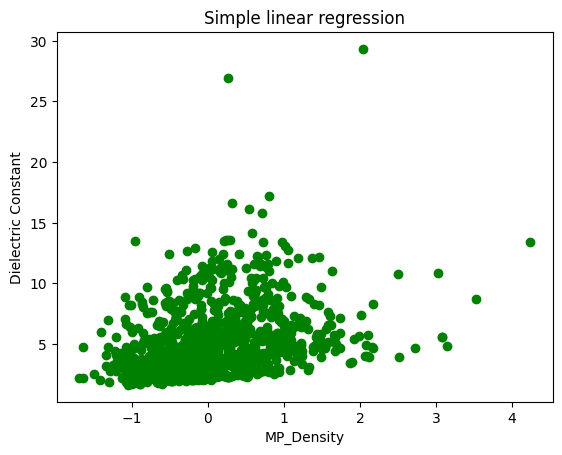

In [ ]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(X_train1['MP_density'],y_train1,color='green')
plt.ylabel('Dielectric Constant')
plt.xlabel('MP_Density')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

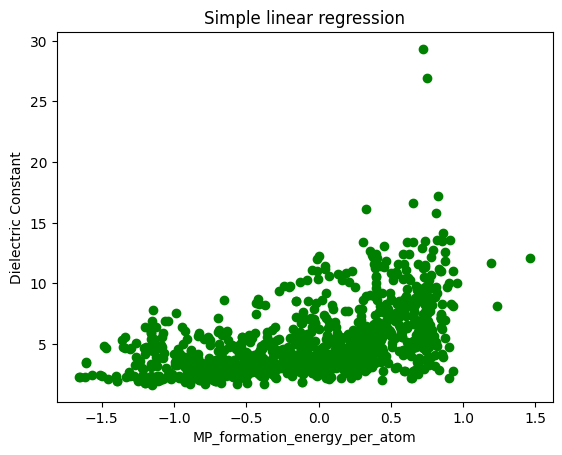

In [ ]:

# Scatter plot of Trg vs 1st correlated feature
plt.scatter(X_train1['MP_formation_energy_per_atom'],y_train1,color='green')
plt.ylabel('Dielectric Constant')
plt.xlabel('MP_formation_energy_per_atom')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

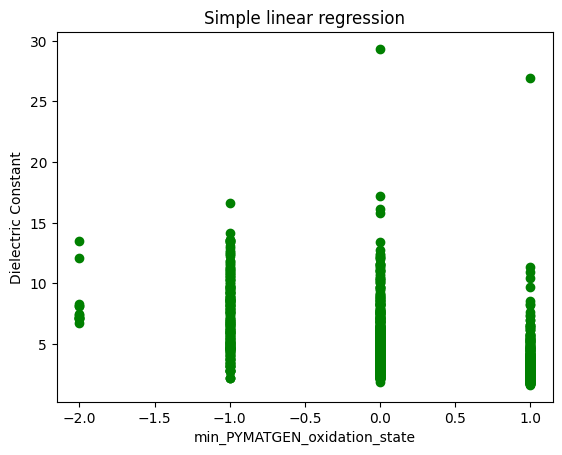

In [ ]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(X_train1['min_PYMATGEN_oxidation_state'],y_train1,color='green')
plt.ylabel('Dielectric Constant')
plt.xlabel('min_PYMATGEN_oxidation_state')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

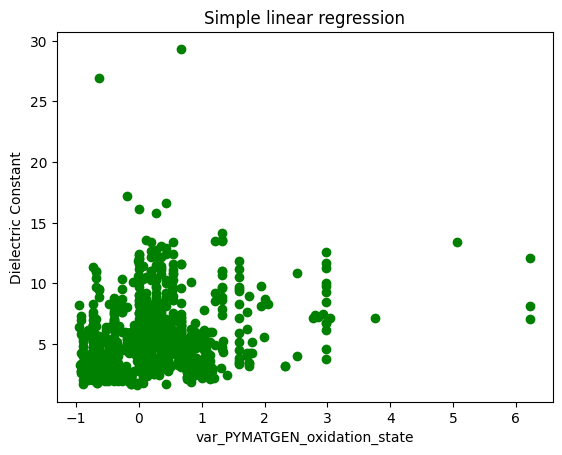

In [ ]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(X_train1['var_PYMATGEN_oxidation_state'],y_train1,color='green')
plt.ylabel('Dielectric Constant')
plt.xlabel('var_PYMATGEN_oxidation_state')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

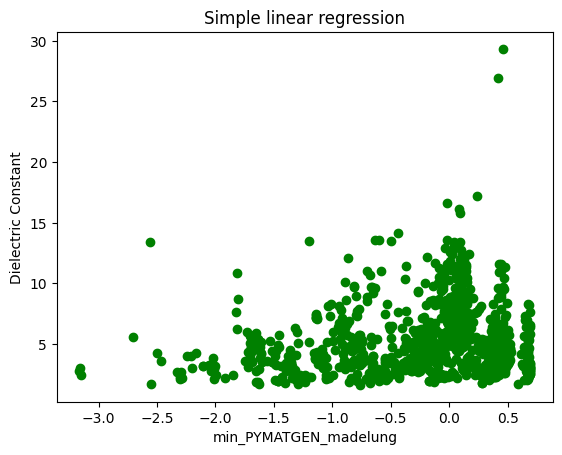

In [ ]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(X_train1['min_PYMATGEN_madelung'],y_train1,color='green')
plt.ylabel('Dielectric Constant')
plt.xlabel('min_PYMATGEN_madelung')
plt.title('Simple linear regression')

Text(0.5, 1.0, 'Simple linear regression')

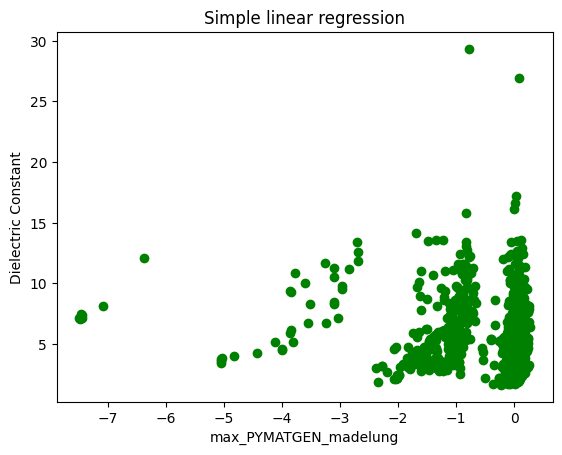

In [ ]:
# Scatter plot of Trg vs 1st correlated feature
plt.scatter(X_train1['max_PYMATGEN_madelung'],y_train1,color='green')
plt.ylabel('Dielectric Constant')
plt.xlabel('max_PYMATGEN_madelung')
plt.title('Simple linear regression')

In [ ]:
y_train1

484     2.986732
1144    5.576198
589     2.052536
474     2.361448
305     6.117279
          ...   
999     2.110940
1204    6.868292
1059    4.076011
1143    2.553375
1251    2.290033
Length: 1055, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
X_train1.columns

Index(['MP_band_gap', 'delta_pauling_eneg', 'MP_density',
       'MP_formation_energy_per_atom', 'min_PYMATGEN_oxidation_state',
       'min_PYMATGEN_madelung', 'max_PYMATGEN_madelung',
       'var_PYMATGEN_oxidation_state', 'OneHot_Cs+', 'OneHot_K+', 'OneHot_Rb+',
       'OneHot_Ba2+', 'OneHot_Na+', 'OneHot_Sr2+', 'OneHot_Li+', 'OneHot_Ca2+',
       'OneHot_La3+', 'OneHot_Y3+', 'OneHot_Hf4+', 'OneHot_Mg2+',
       'OneHot_Zr4+', 'OneHot_Sc3+', 'OneHot_Ta5+', 'OneHot_Ti4+',
       'OneHot_Mn2+', 'OneHot_Mn4+', 'OneHot_Be2+', 'OneHot_Nb3+',
       'OneHot_Nb5+', 'OneHot_Al3+', 'OneHot_Tl+', 'OneHot_Tl3+', 'OneHot_V2+',
       'OneHot_Zn2+', 'OneHot_Cr3+', 'OneHot_Cd2+', 'OneHot_In3+',
       'OneHot_Ga2+', 'OneHot_Ga3+', 'OneHot_Fe2+', 'OneHot_Fe3+',
       'OneHot_Cu+', 'OneHot_Si4+', 'OneHot_Ni2+', 'OneHot_Ag+', 'OneHot_Sn2+',
       'OneHot_Sn4+', 'OneHot_Hg2+', 'OneHot_Ge2+', 'OneHot_Ge4+',
       'OneHot_Bi3-', 'OneHot_Bi3+', 'OneHot_Bi5+', 'OneHot_B3+',
       'OneHot_Sb3-', 'OneH

In [ ]:
X_train1.describe()

MP_band_gap  delta_pauling_eneg   MP_density  \
count  1055.000000         1055.000000  1055.000000   
mean      0.183603            0.006253     0.057981   
std       0.696219            0.633426     0.766339   
min      -0.720302           -1.579832    -1.687962   
25%      -0.393141           -0.495798    -0.491934   
50%       0.011258            0.008403    -0.021533   
75%       0.618482            0.504202     0.521782   
max       2.547845            1.478992     4.241491   

       MP_formation_energy_per_atom  min_PYMATGEN_oxidation_state  \
count                   1055.000000                   1055.000000   
mean                      -0.076016                      0.122275   
std                        0.621928                      0.743872   
min                       -1.654590                     -2.000000   
25%                       -0.558840                      0.000000   
50%                       -0.000702                      0.000000   
75%                        0.434666                      1.000000   
max                        1.464632                      1.000000   

       min_PYMATGEN_madelung  max_PYMATGEN_madelung  \
count            1055.000000            1055.000000   
mean               -0.211071              -0.468345   
std                 0.731520               1.051940   
min                -3.163064              -7.488097   
25%                -0.648928              -0.926110   
50%                -0.008033               0.007321   
75%                 0.383433               0.099512   
max                 0.694648               0.276619   

       var_PYMATGEN_oxidation_state   OneHot_Cs+    OneHot_K+  ...  \
count                   1055.000000  1055.000000  1055.000000  ...   
mean                       0.078671     0.049446     0.082719  ...   
std                        0.850825     0.174373     0.243383  ...   
min                       -0.945508     0.000000     0.000000  ...   
25%                       -0.636230     0.000000     0.000000  ...   
50%                        0.000000     0.000000     0.000000  ...   
75%                        0.443667     0.000000     0.000000  ...   
max                        6.229750     1.500000     1.500000  ...   

        OneHot_S6+    OneHot_I-   OneHot_Br-  OneHot_Br5+   OneHot_N3-  \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      0.001219     0.044423     0.054507     0.001311     0.061300   
std       0.019805     0.212002     0.240942     0.021601     0.219912   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.333333     1.500000     1.714286     0.400000     1.333333   

        OneHot_N5+   OneHot_Cl-   OneHot_O2-    OneHot_O-    OneHot_F-  
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000  
mean      0.002817     0.099892     0.298659     0.012006     0.199239  
std       0.034824     0.325047     0.488537     0.118245     0.468622  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.666667     0.000000     0.000000  
max       0.571429     1.714286     1.500000     1.333333     1.714286  

[8 rows x 93 columns]

In [ ]:

#scaled_ds.head()

In [ ]:
#scaled_ds.columns

In [ ]:
#df1=df['MP_band_gap', 'delta_pauling_eneg', 'MP_density',
       #'MP_formation_energy_per_atom', 'min_PYMATGEN_oxidation_state',
       #'min_PYMATGEN_madelung', 'max_PYMATGEN_madelung',
       #'var_PYMATGEN_oxidation_state']

In [ ]:
#X_train.shape

In [ ]:
#from sklearn.decomposition import PCA

In [ ]:
#code for getting explained_variance_ratio
#dim=[]
#var=[]
#for i in range(93):
    #pca = PCA(n_components=i)
    #pca.fit(X_train)
    #var.append(pca.explained_variance_ratio_)
    #dim.append(i)
#var_new=var[92]

In [ ]:
#Plotting explained_variance_ratio with dimension
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')

In [ ]:
#Initiating PCA to reduce dimentions aka features to 5
#pca = PCA(n_components=60)
#pca.fit(df1)
#PCA_ds = pd.DataFrame(pca.transform(df1), columns=(["col1","col2","col3","col4","col 5","col 6","col 7","col 8","col 9","col 10","col 11","col 12","col 13","col 14","col 15"
#,"col 16","col 17","col 18","col 19","col 20","col 21","col 22","col 23","col 24","col 25","col 26",
#"col 27","col 28","col 29","col 30","col 31","col 32","col 33","col 34","col 35","col 36","col 37","col38","col 39","col 40","col 41","col 42","col 43","col 44","col 45","col 46",
#"col 47","col 48","col 49","col 50","col 51","col 52","col 53","col 54","col 55","col 56","col 57","col 58","col 59","col 60"]))
#PCA_ds.describe().T

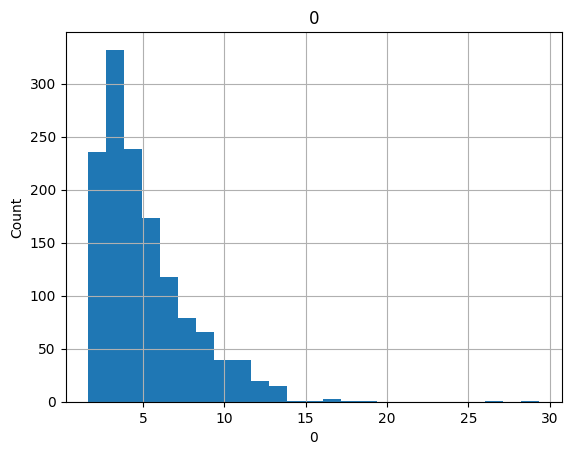

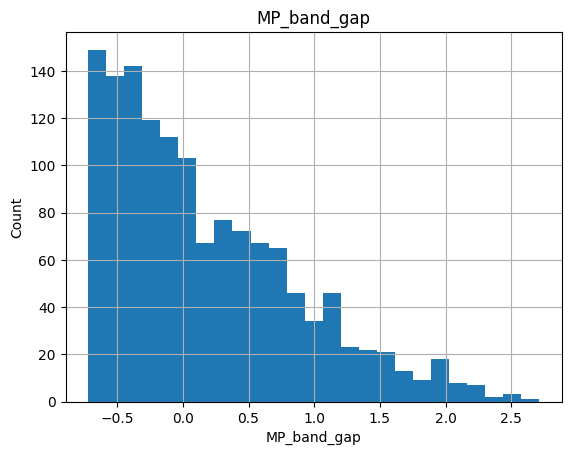

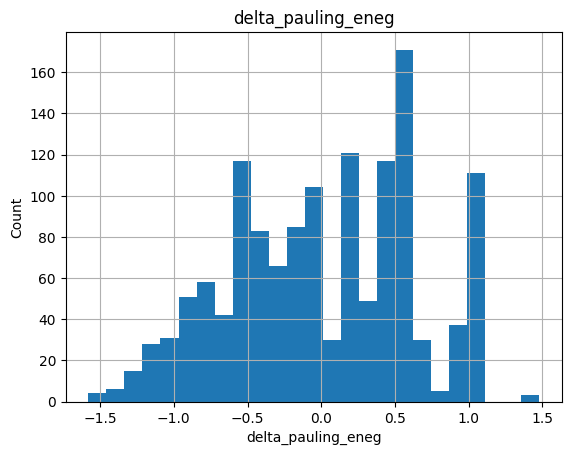

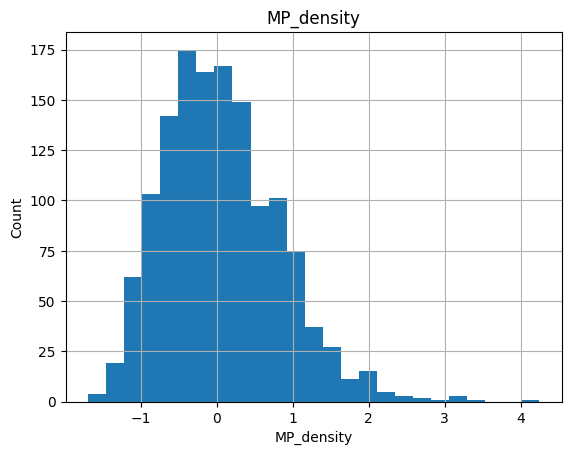

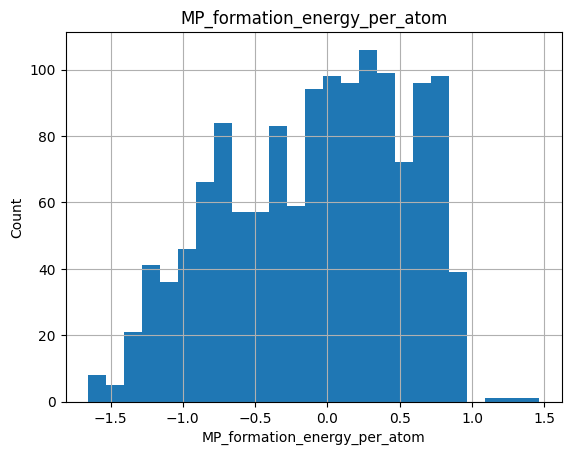

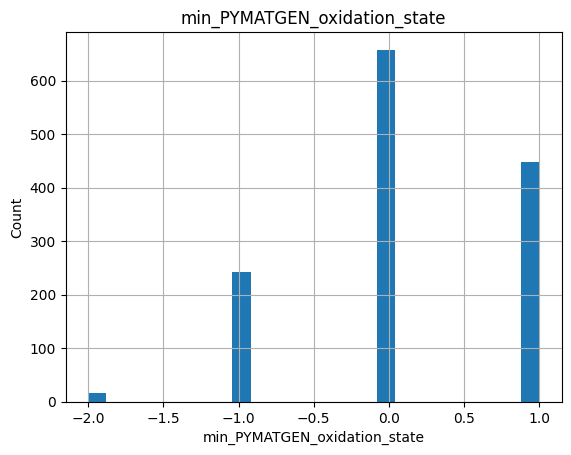

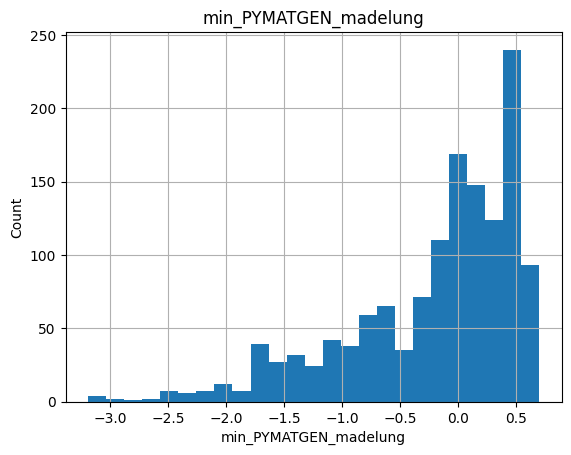

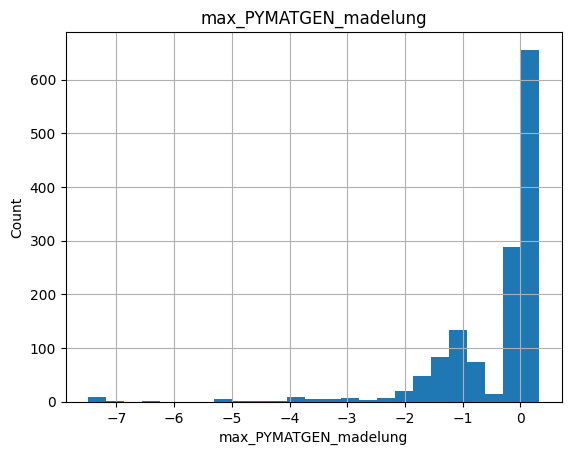

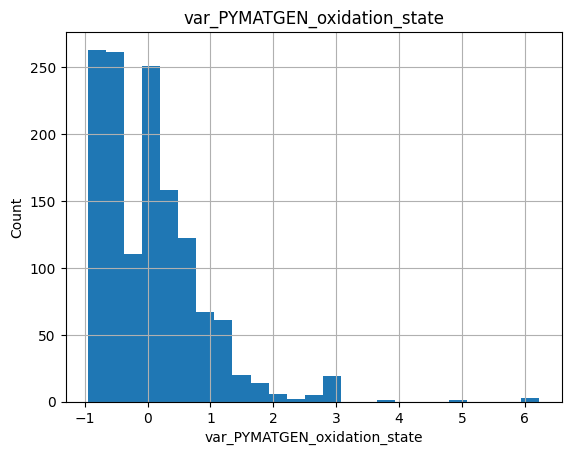

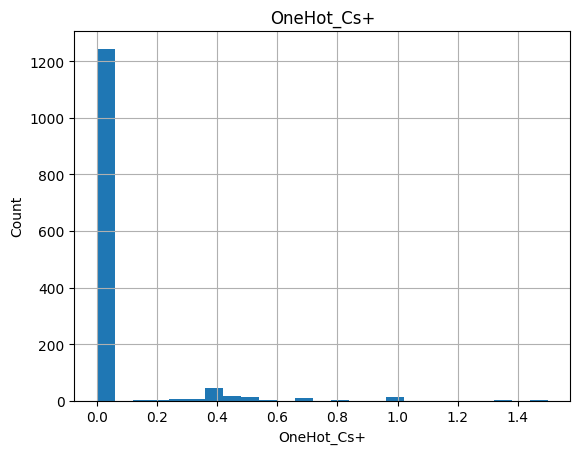

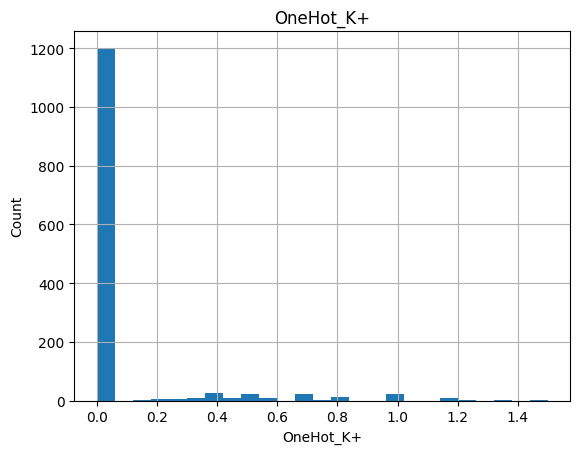

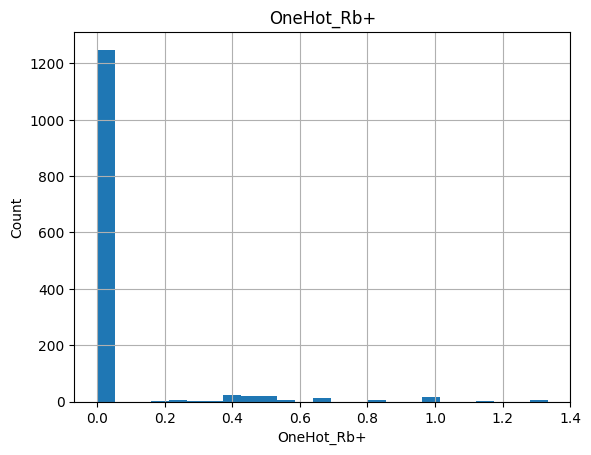

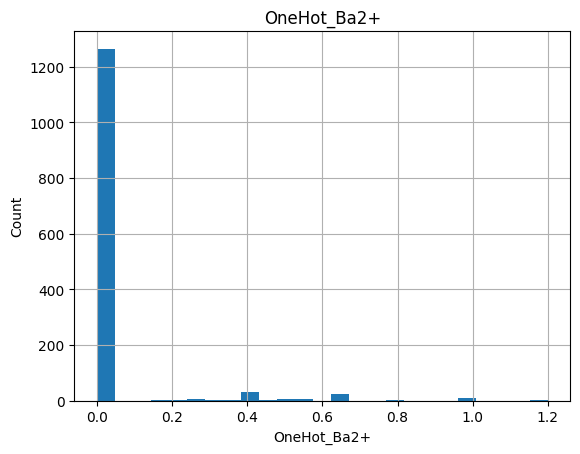

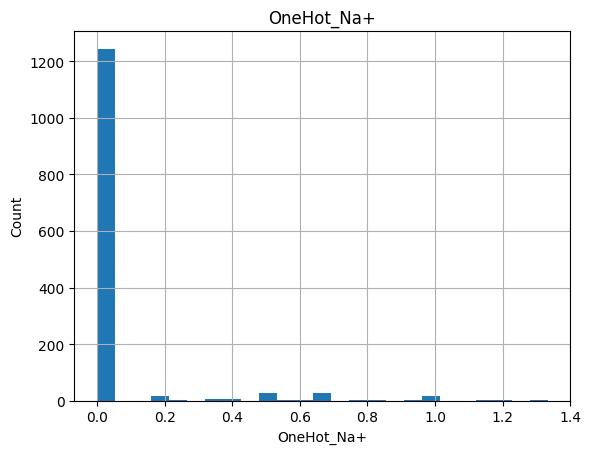

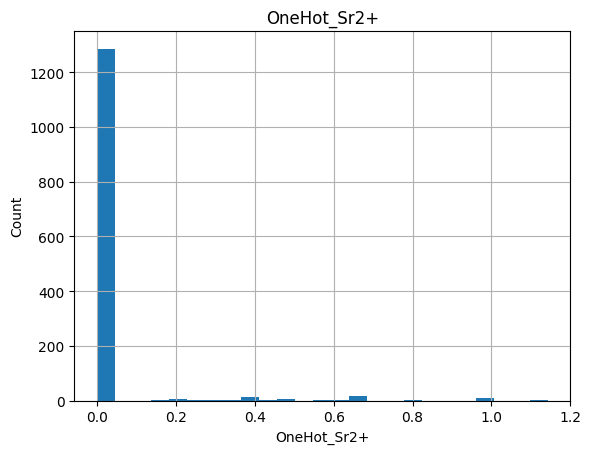

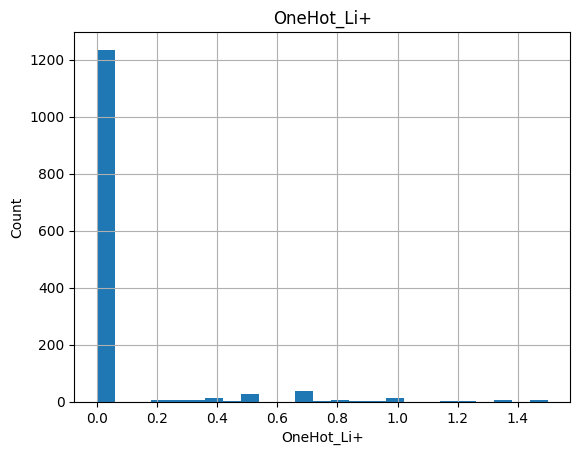

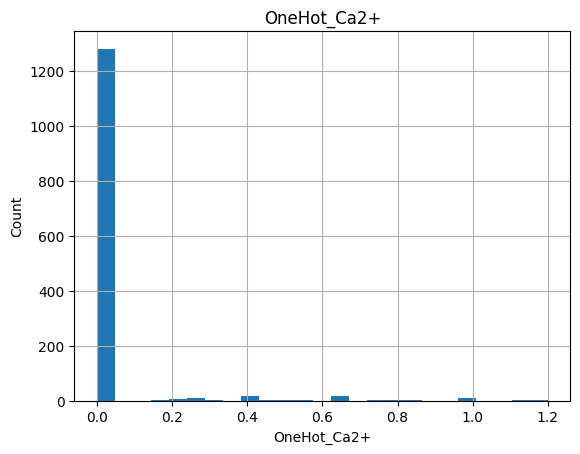

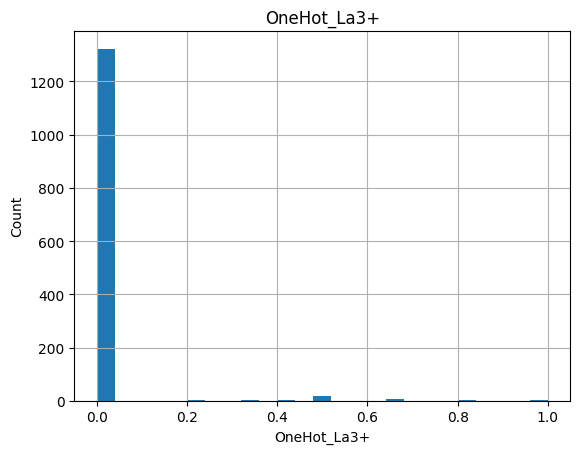

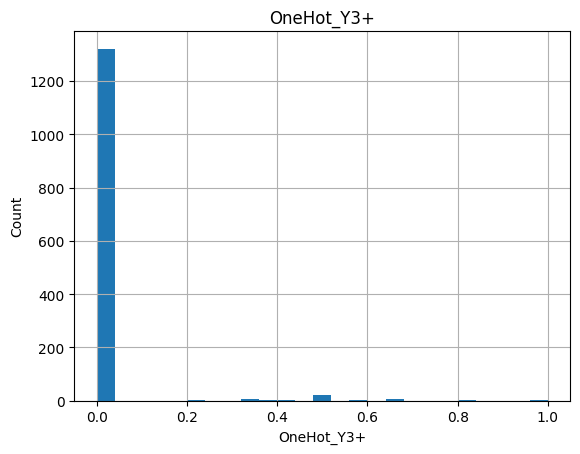

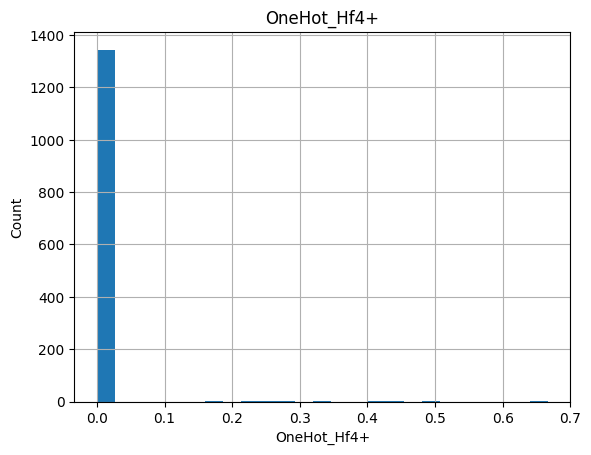

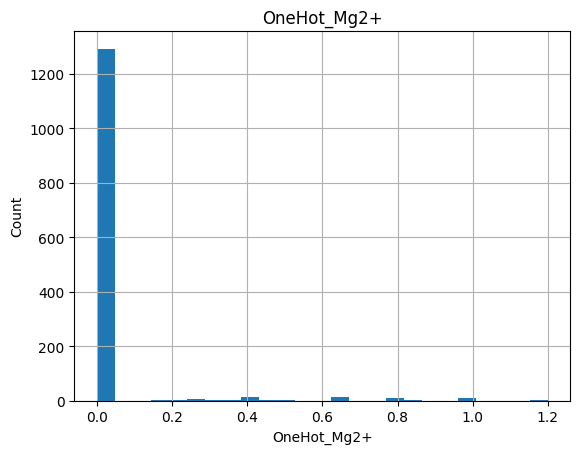

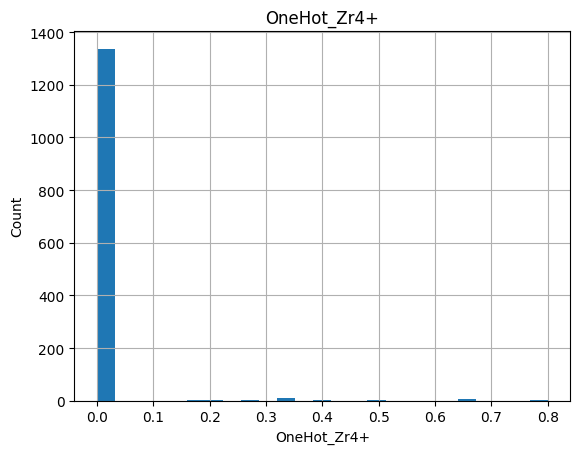

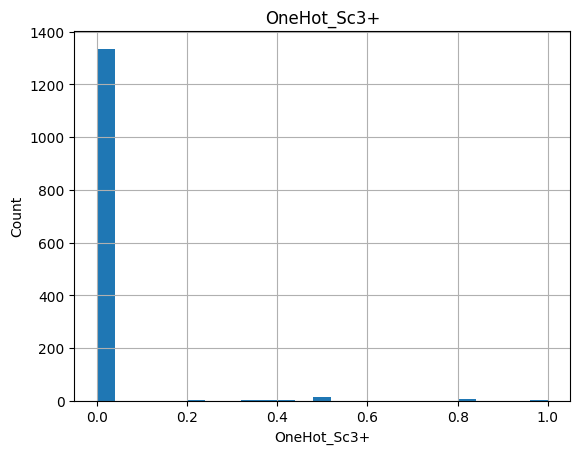

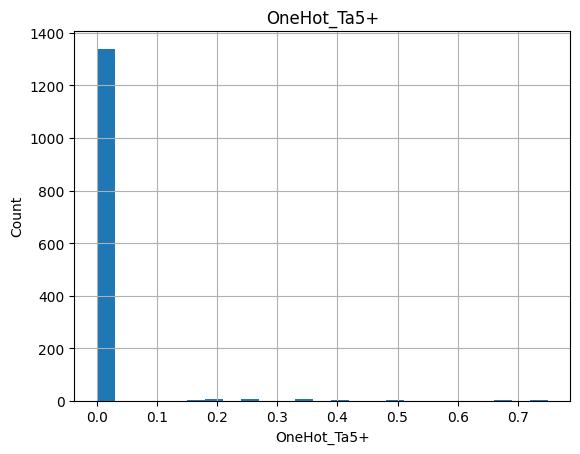

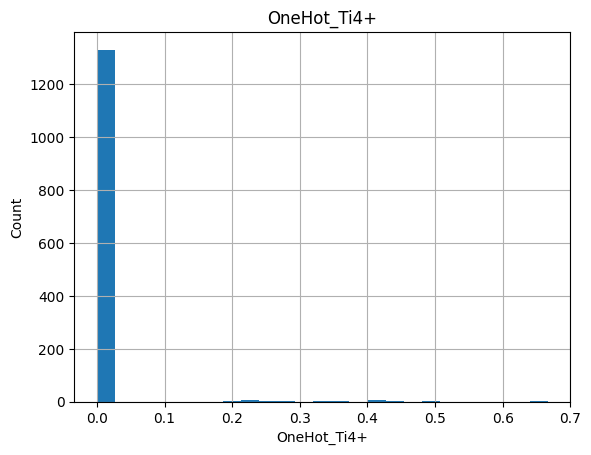

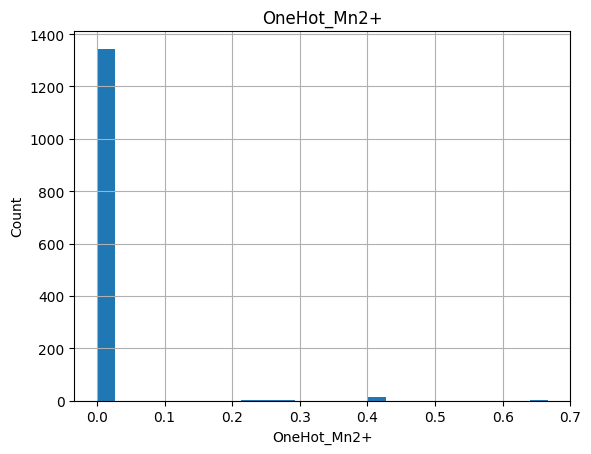

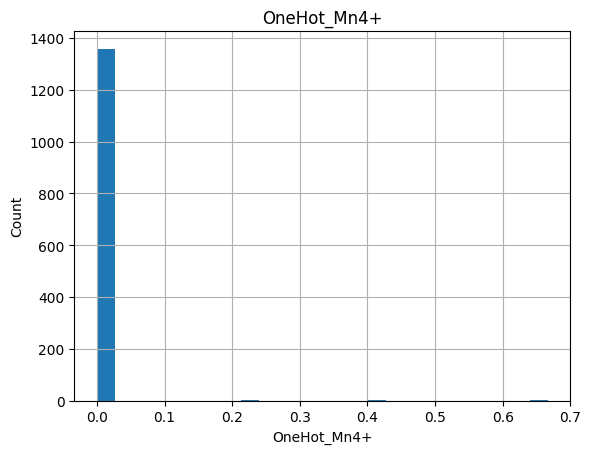

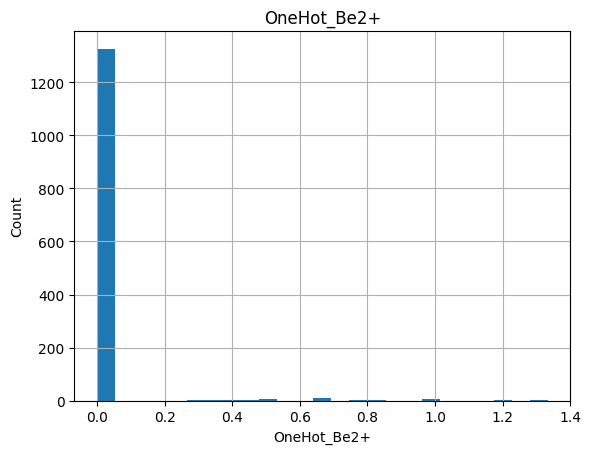

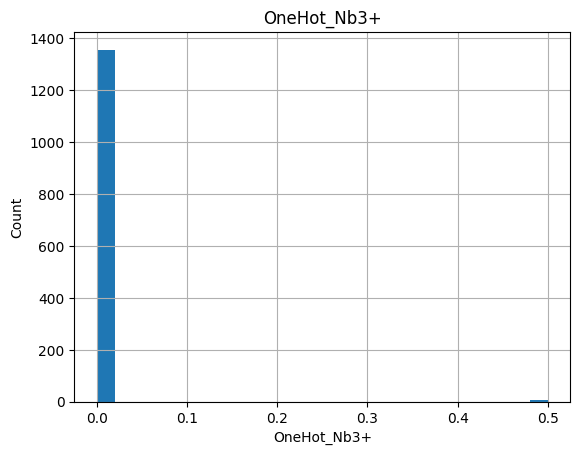

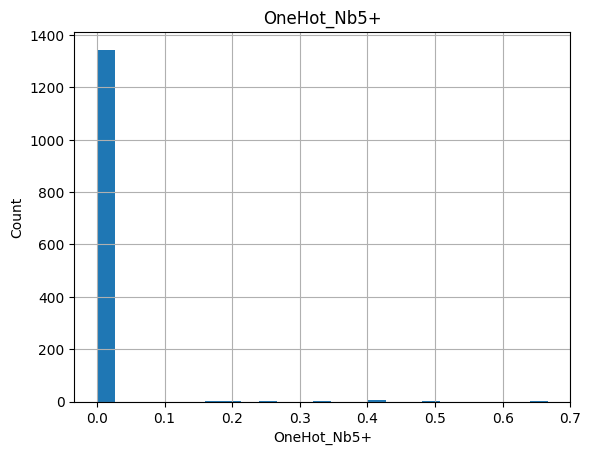

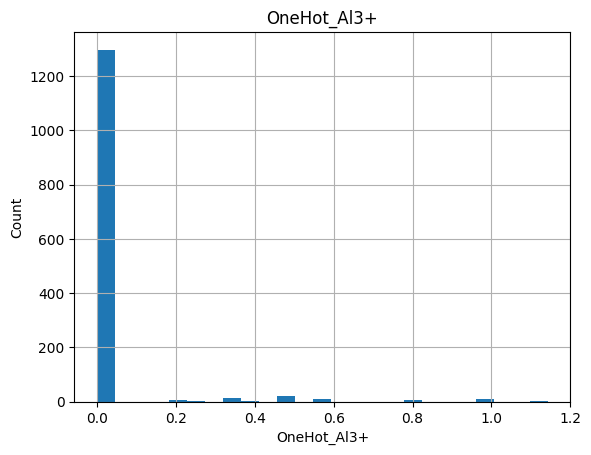

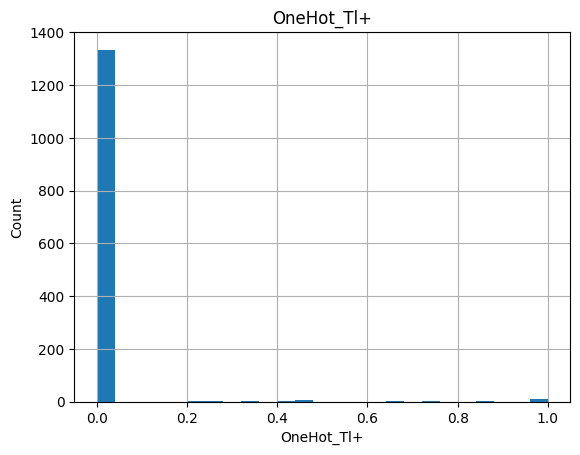

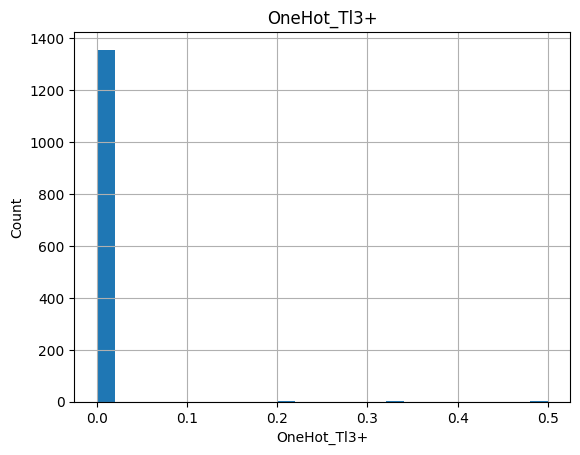

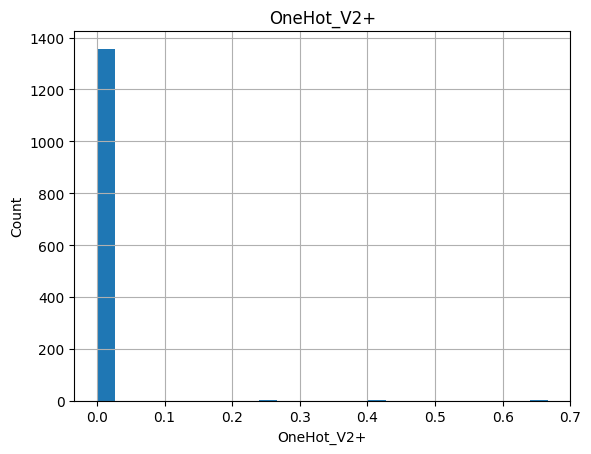

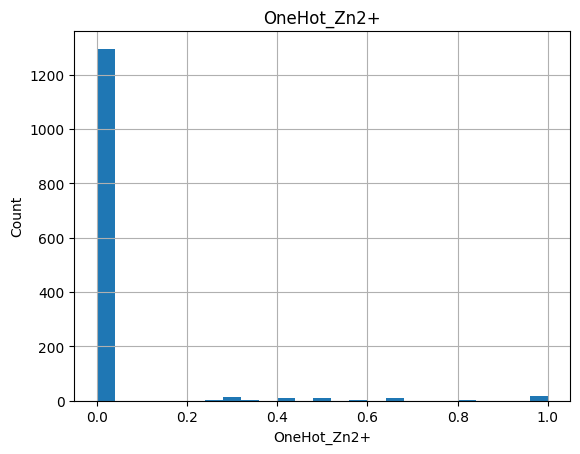

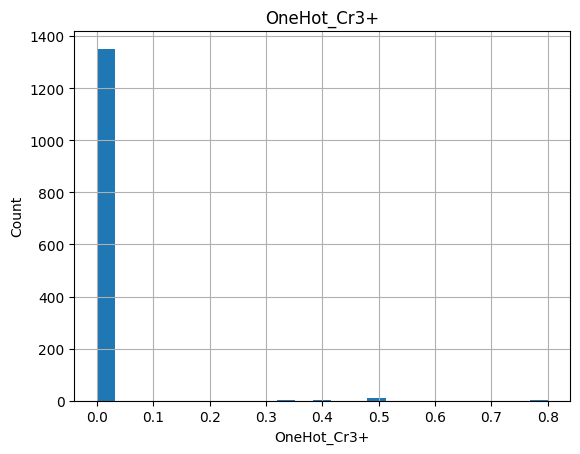

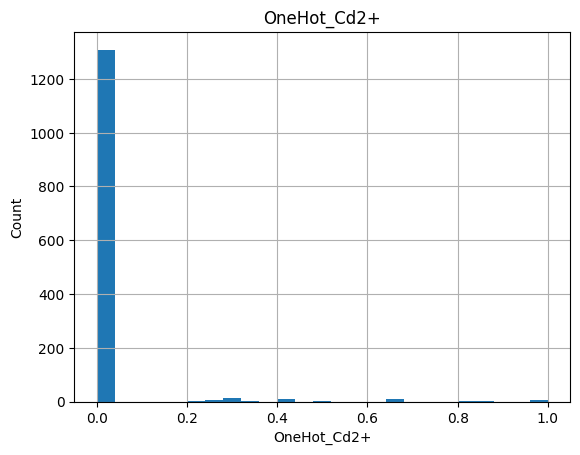

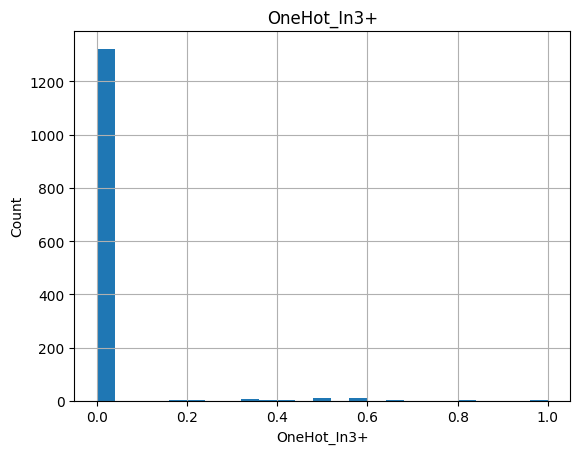

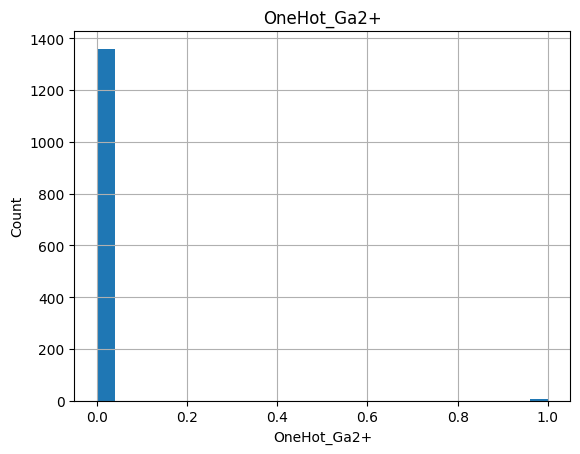

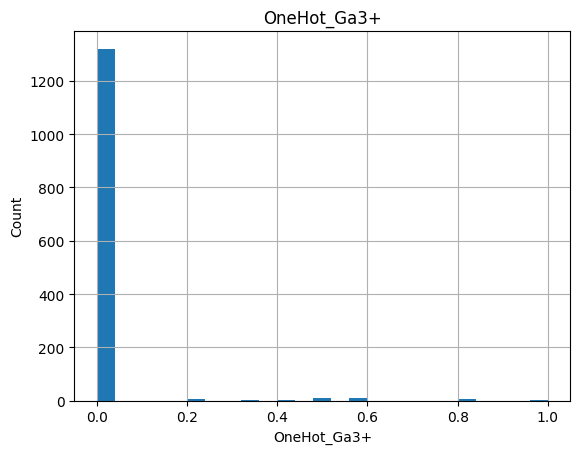

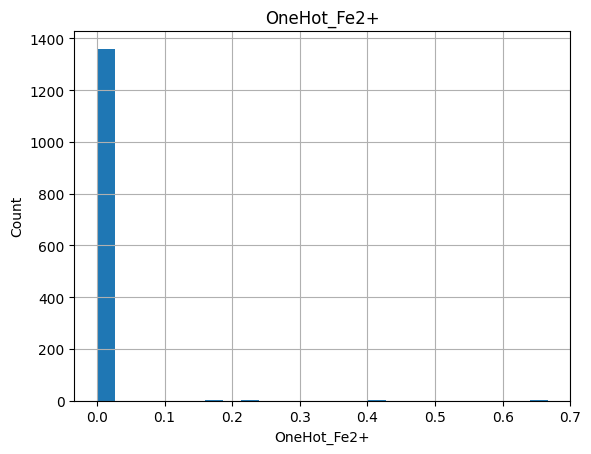

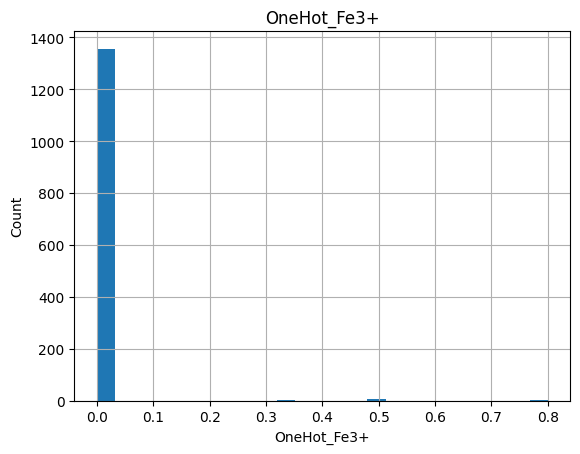

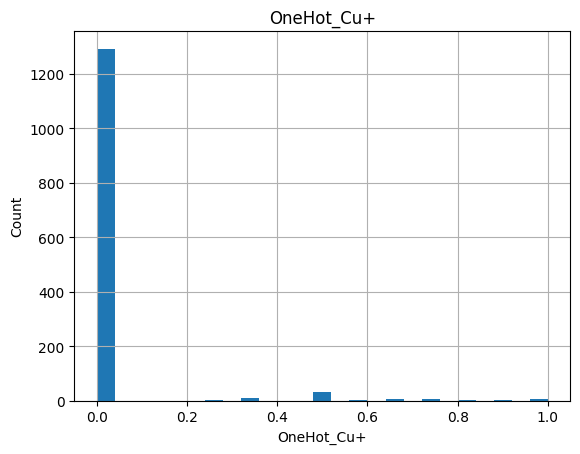

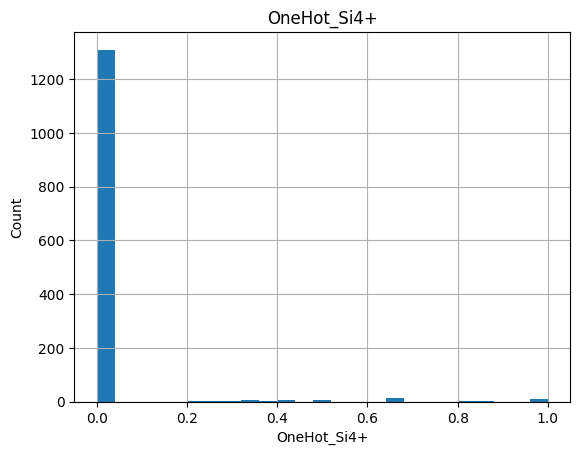

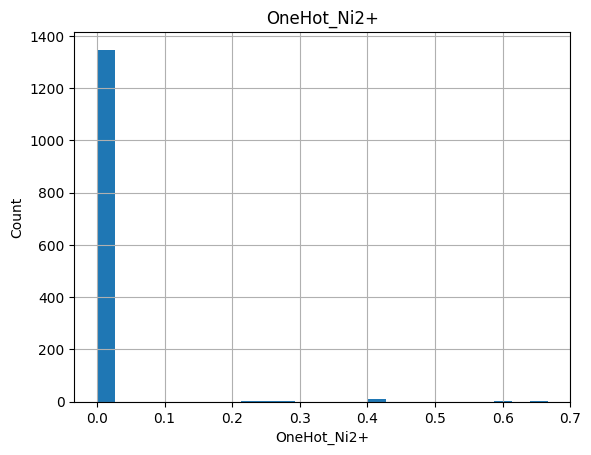

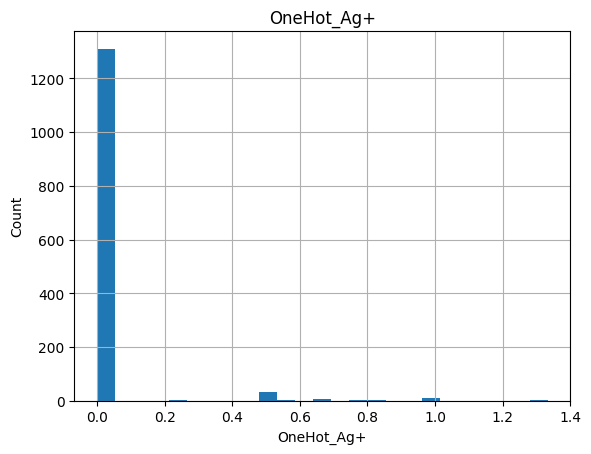

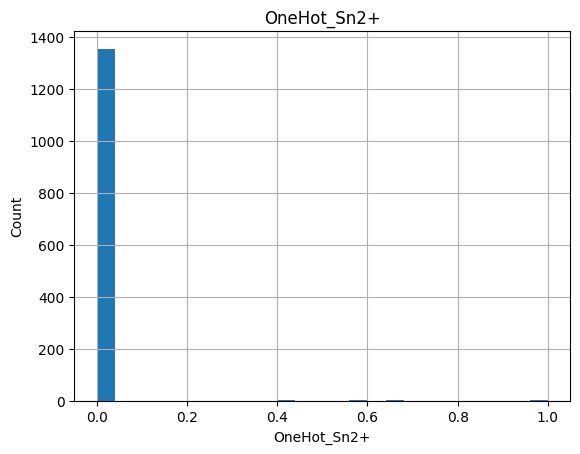

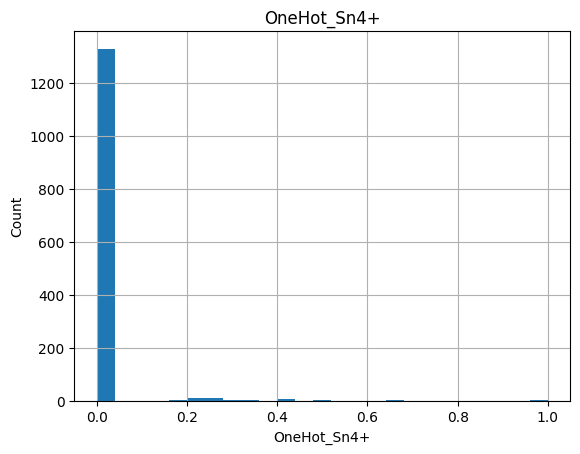

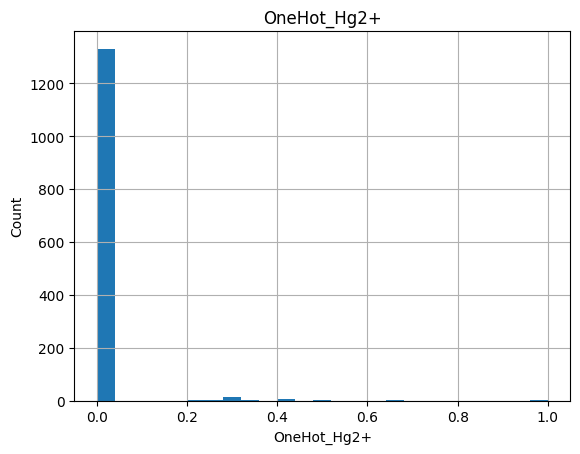

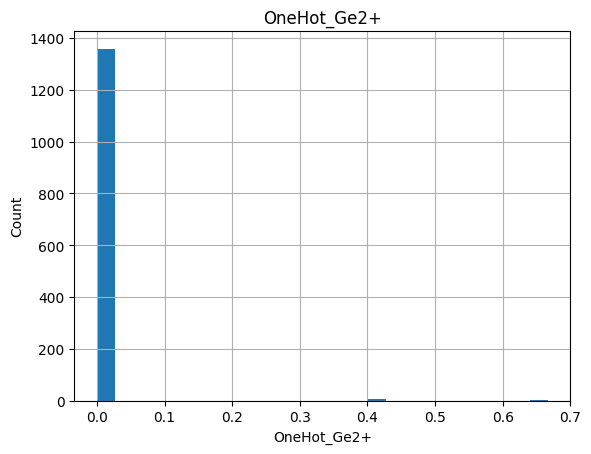

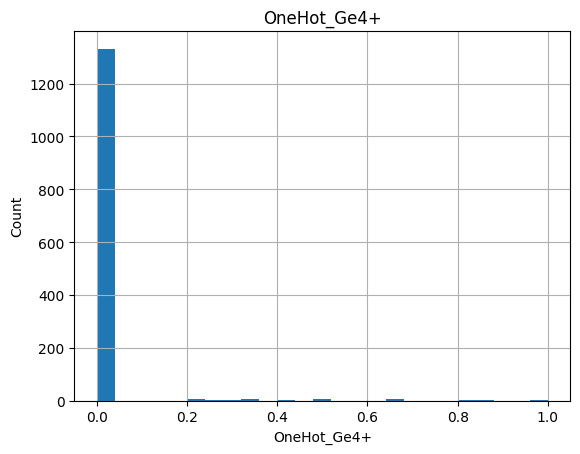

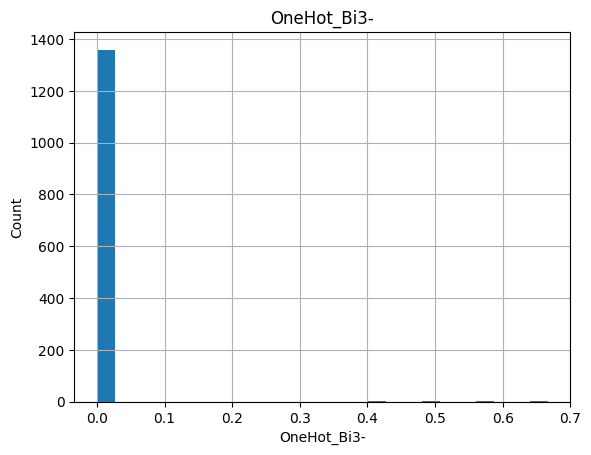

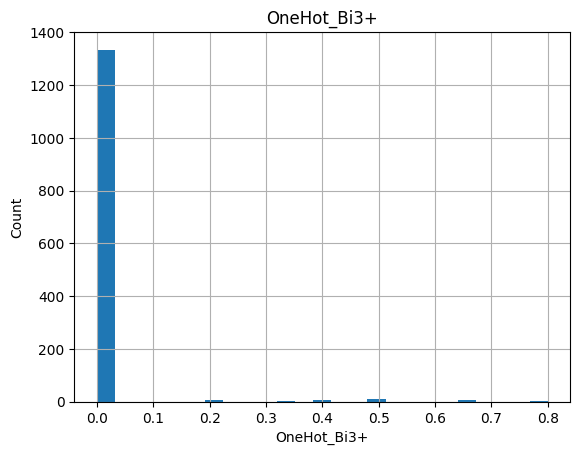

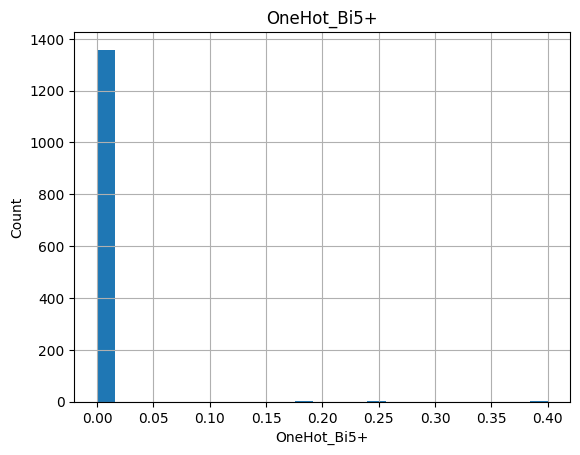

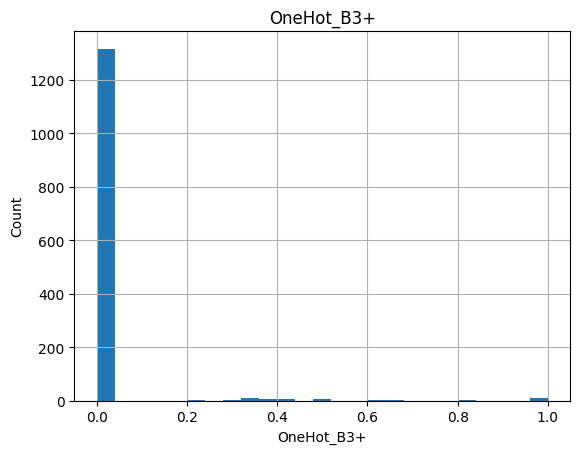

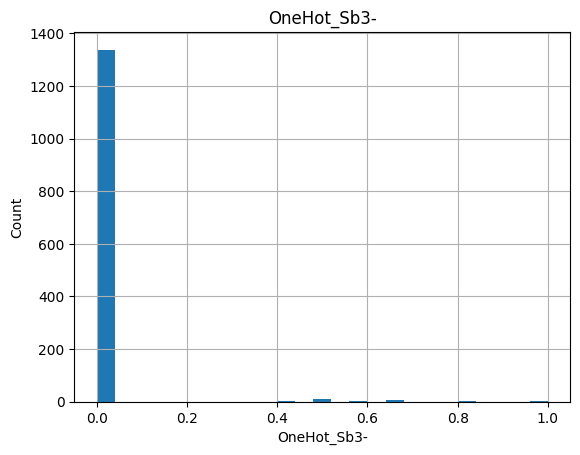

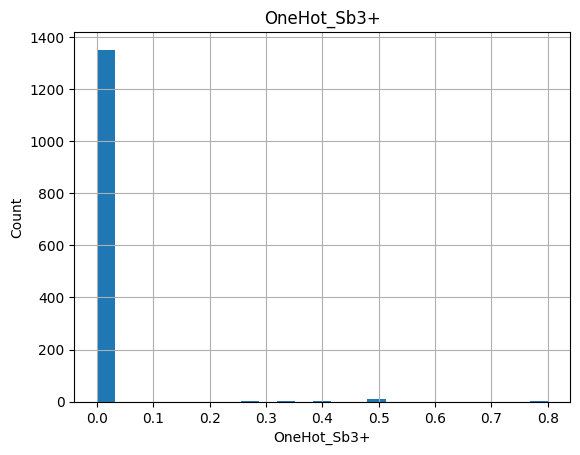

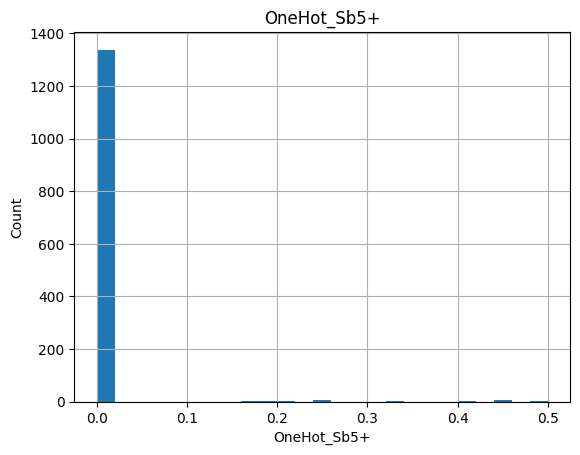

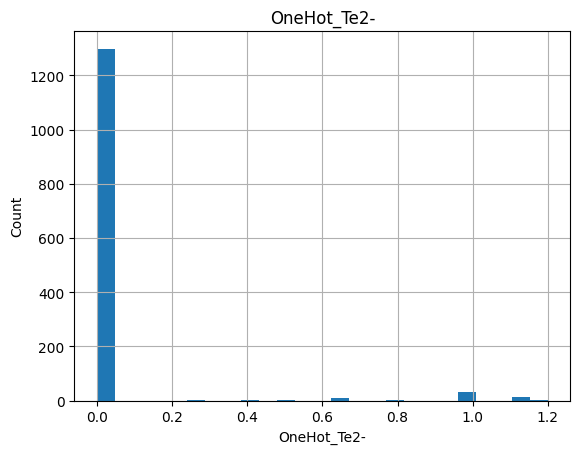

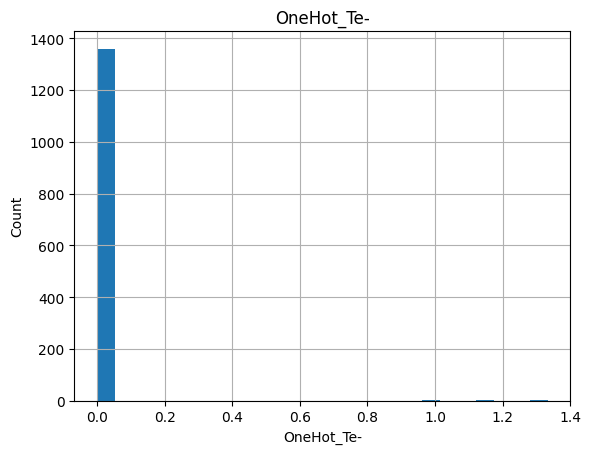

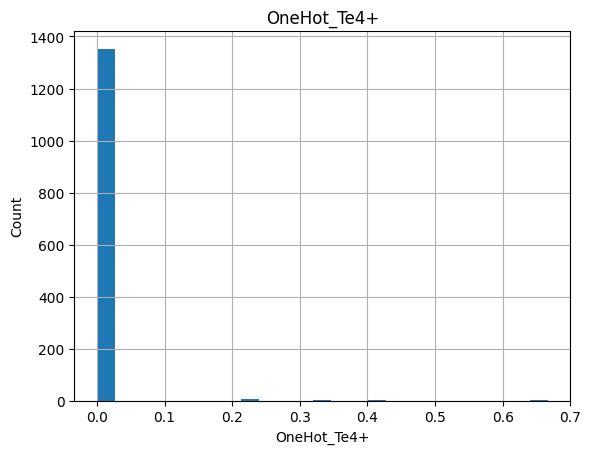

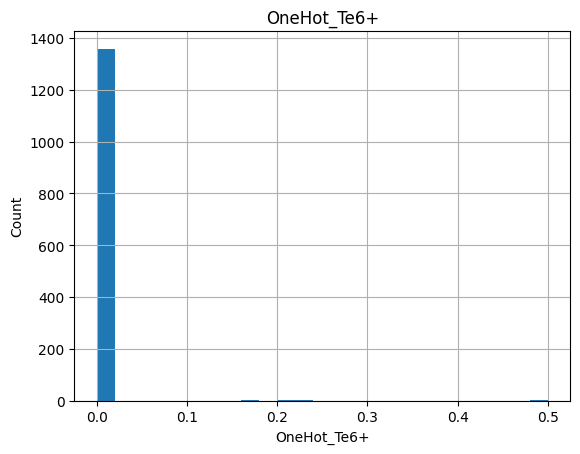

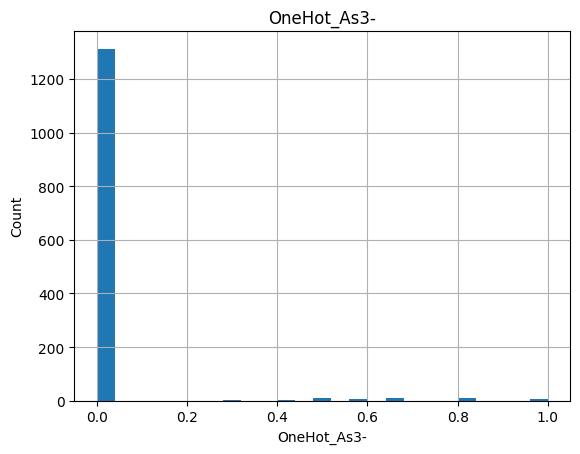

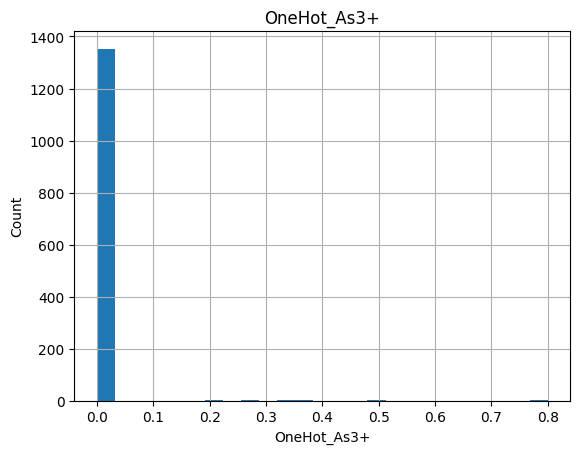

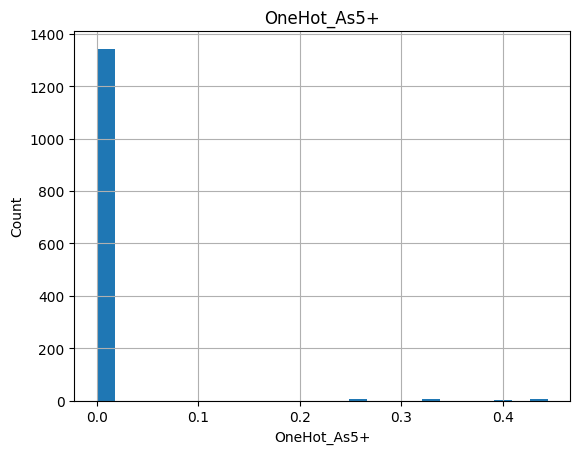

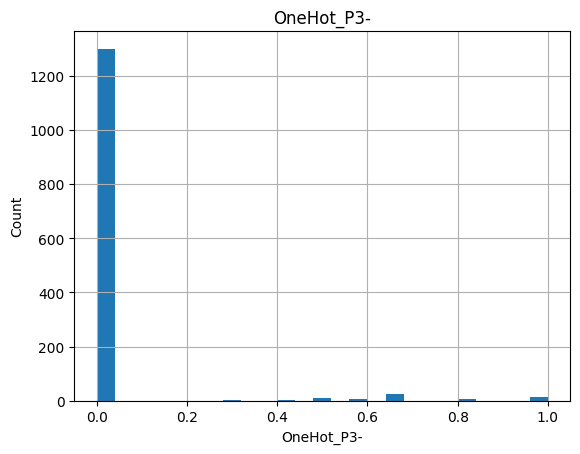

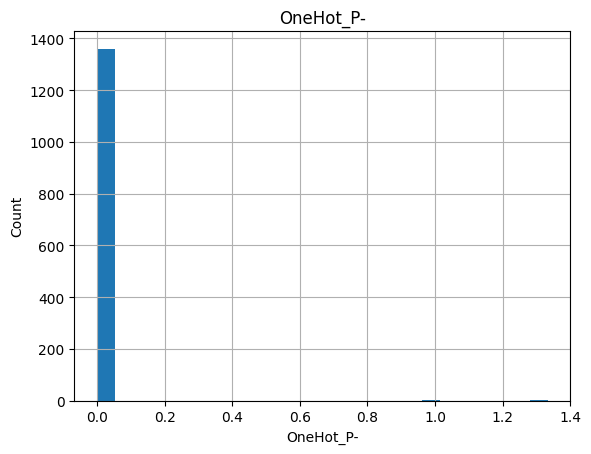

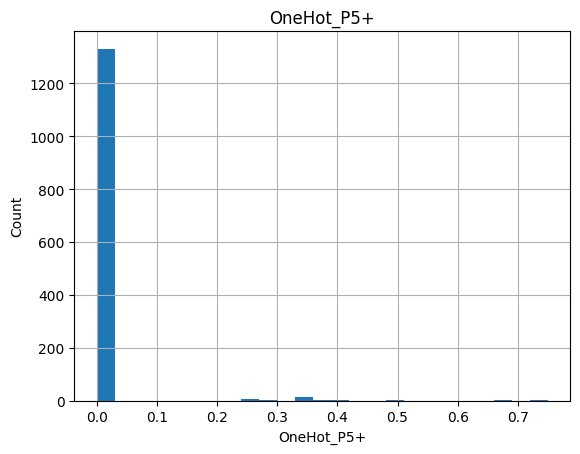

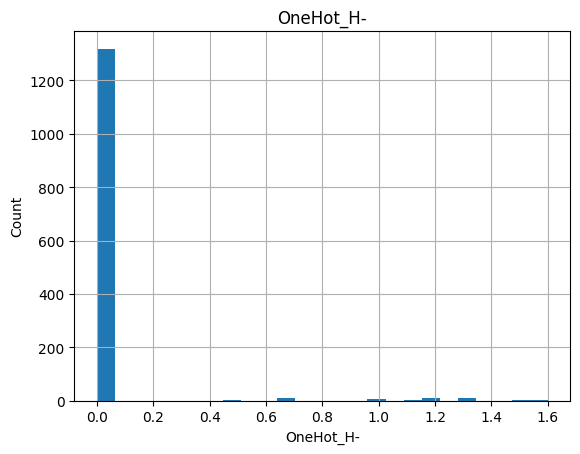

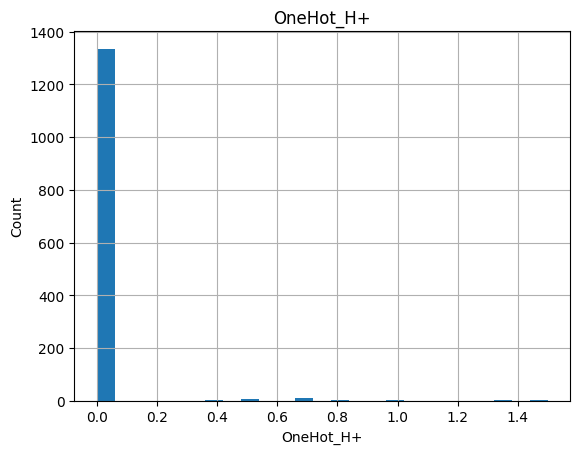

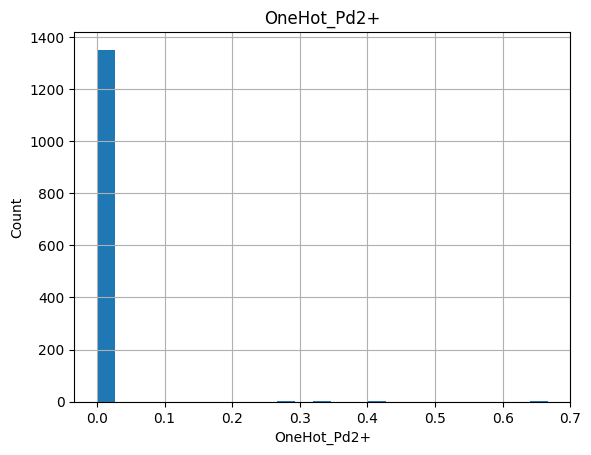

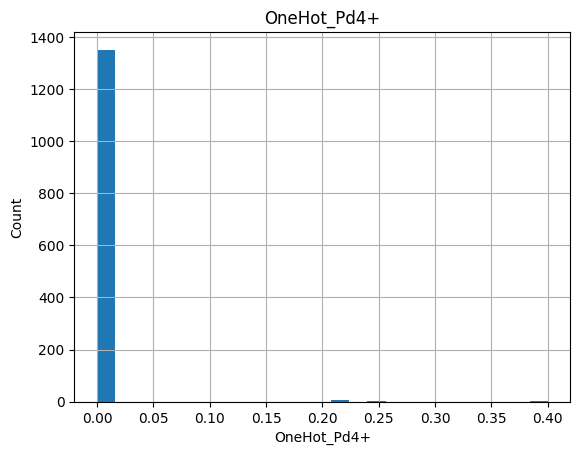

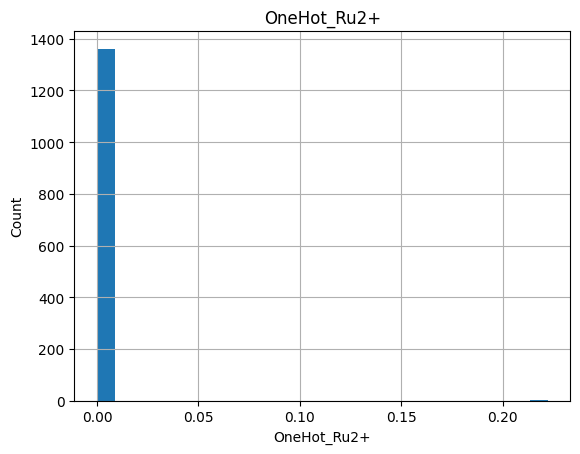

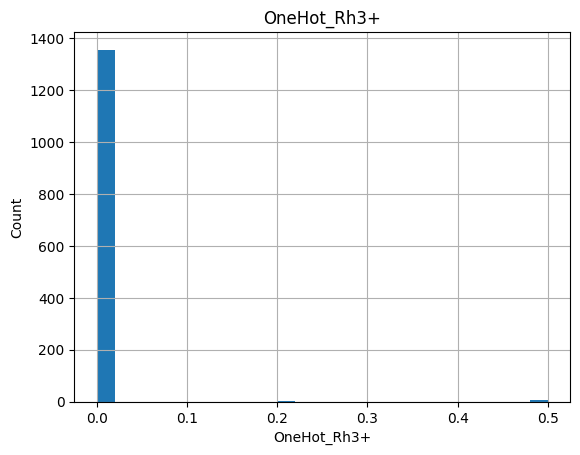

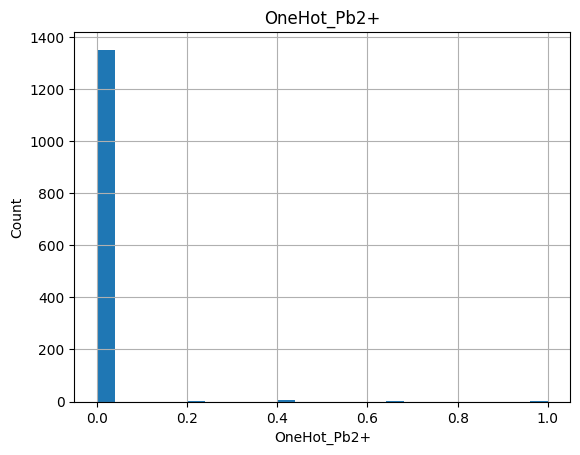

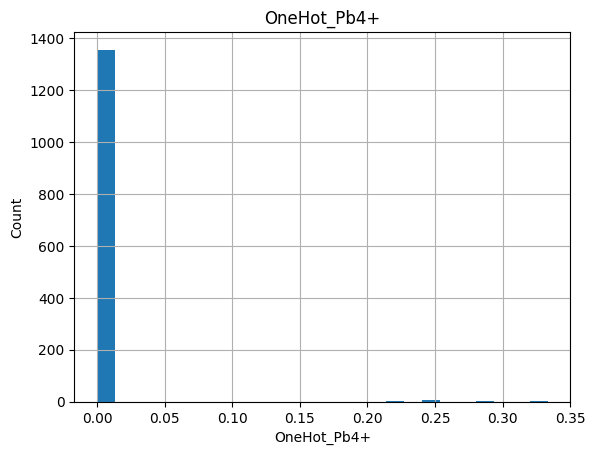

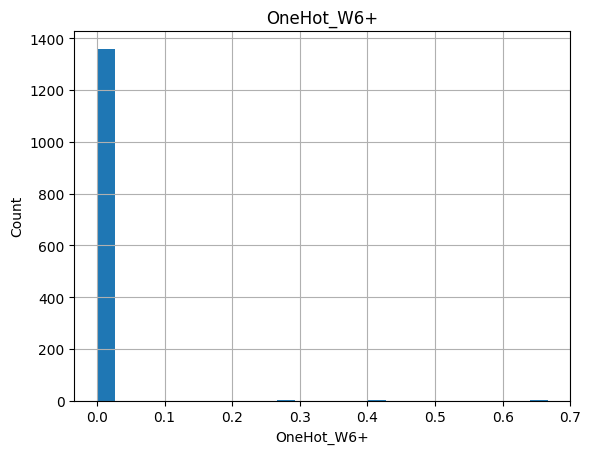

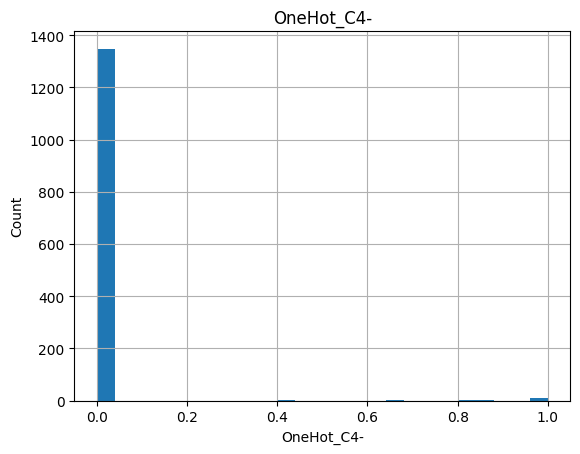

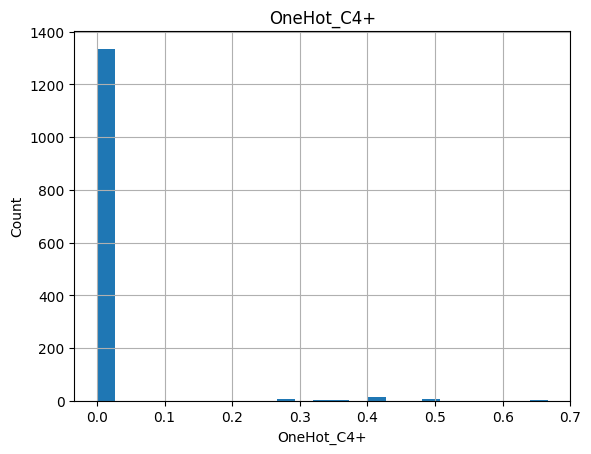

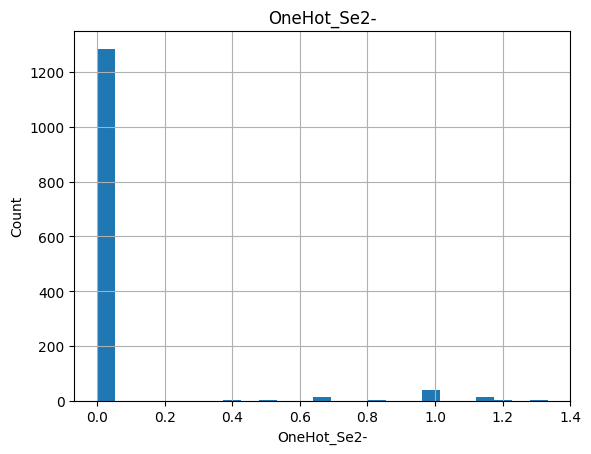

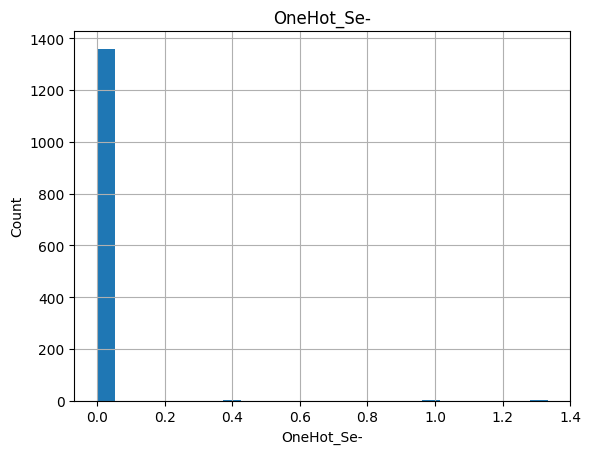

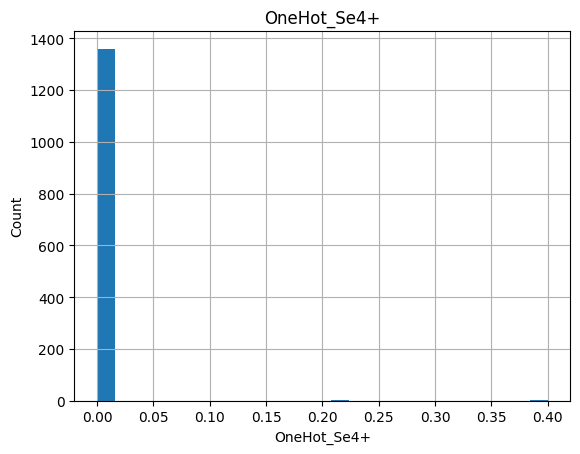

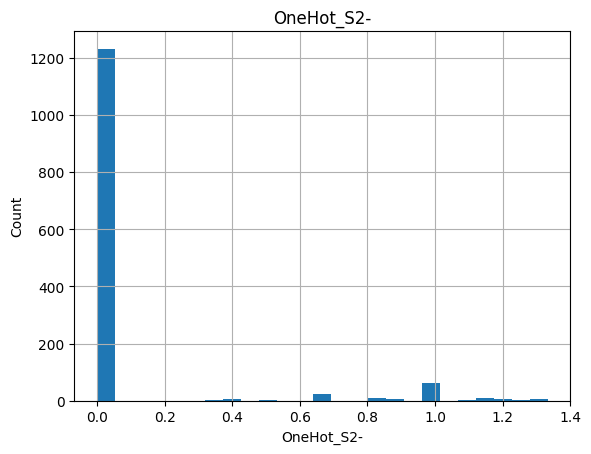

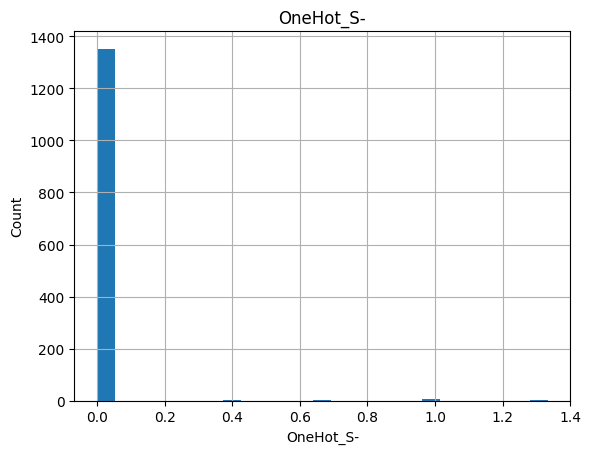

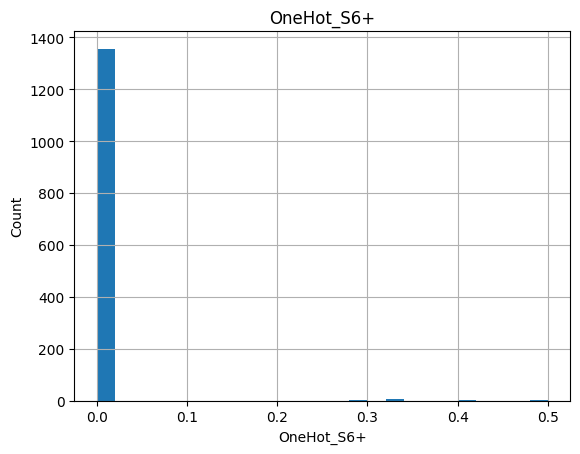

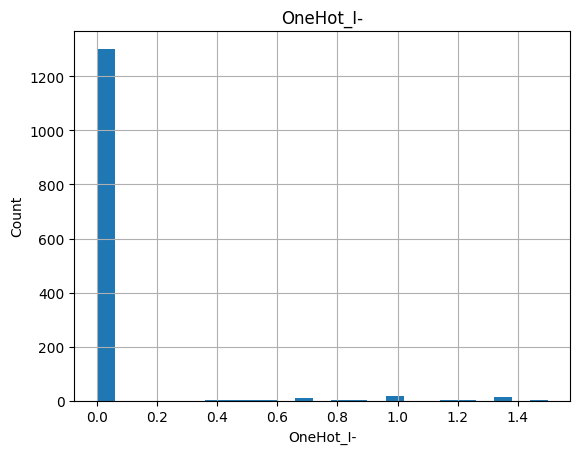

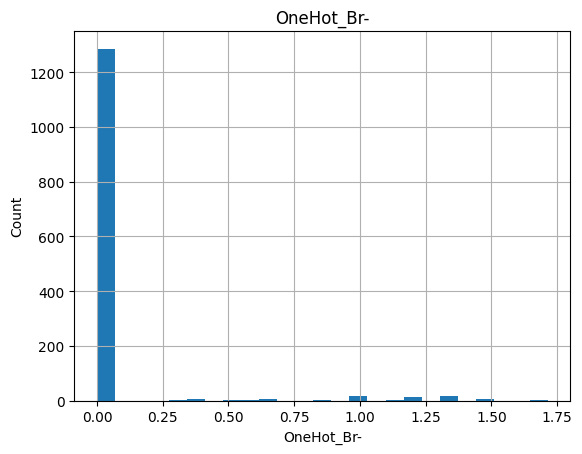

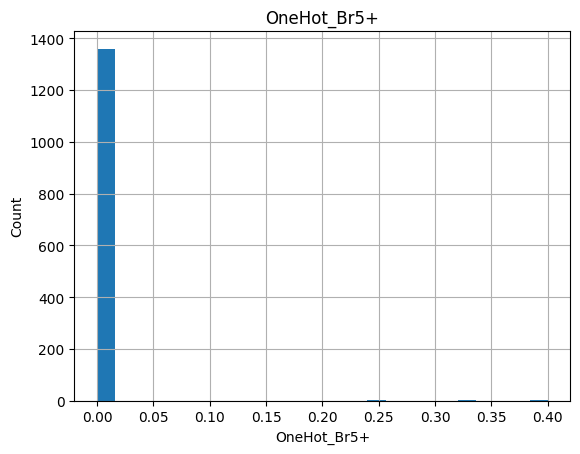

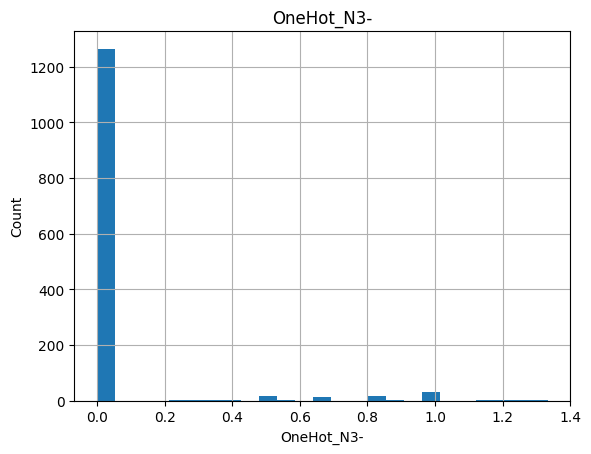

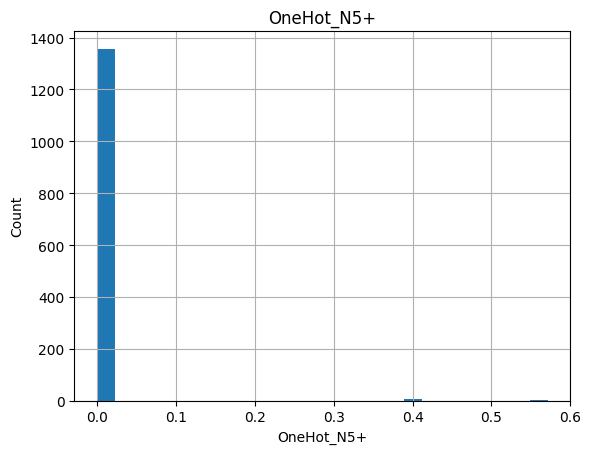

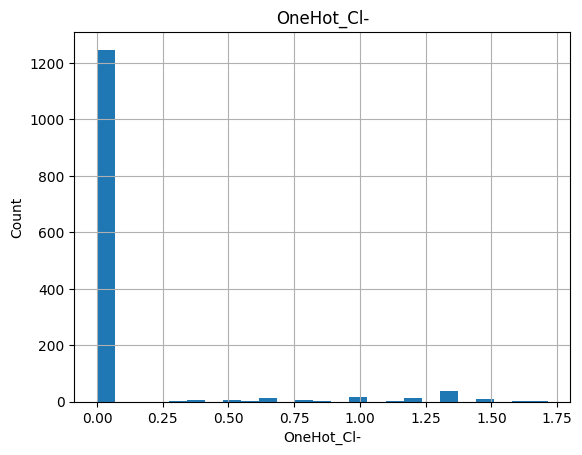

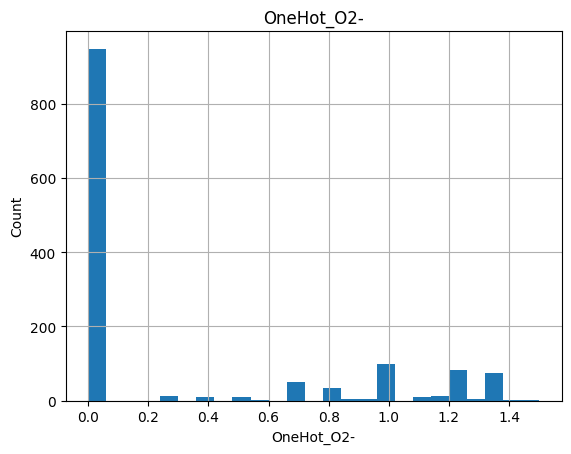

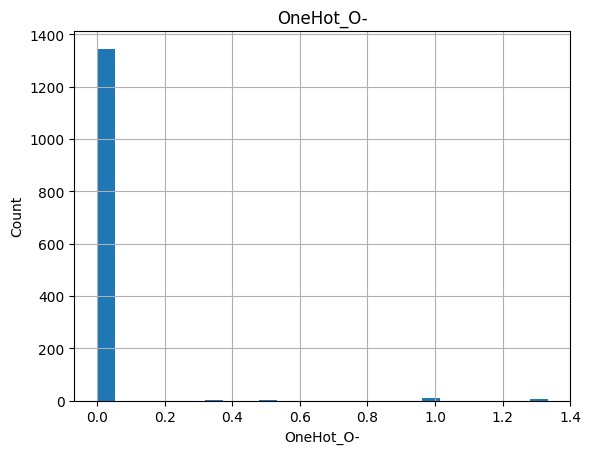

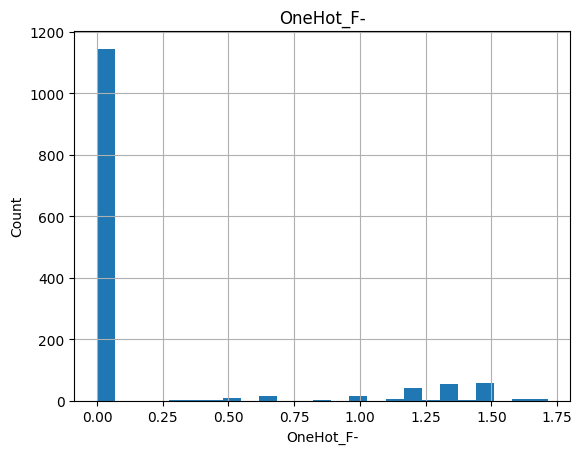

In [ ]:
#Checking distributions of each features.
for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

# list of numerical variables
numerical_features = [feature for feature in X_train1.columns if X_train1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
#df[numerical_features].head()

Number of numerical variables:  93


In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(X_train1[feature].unique())<10]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 62


<Axes: >

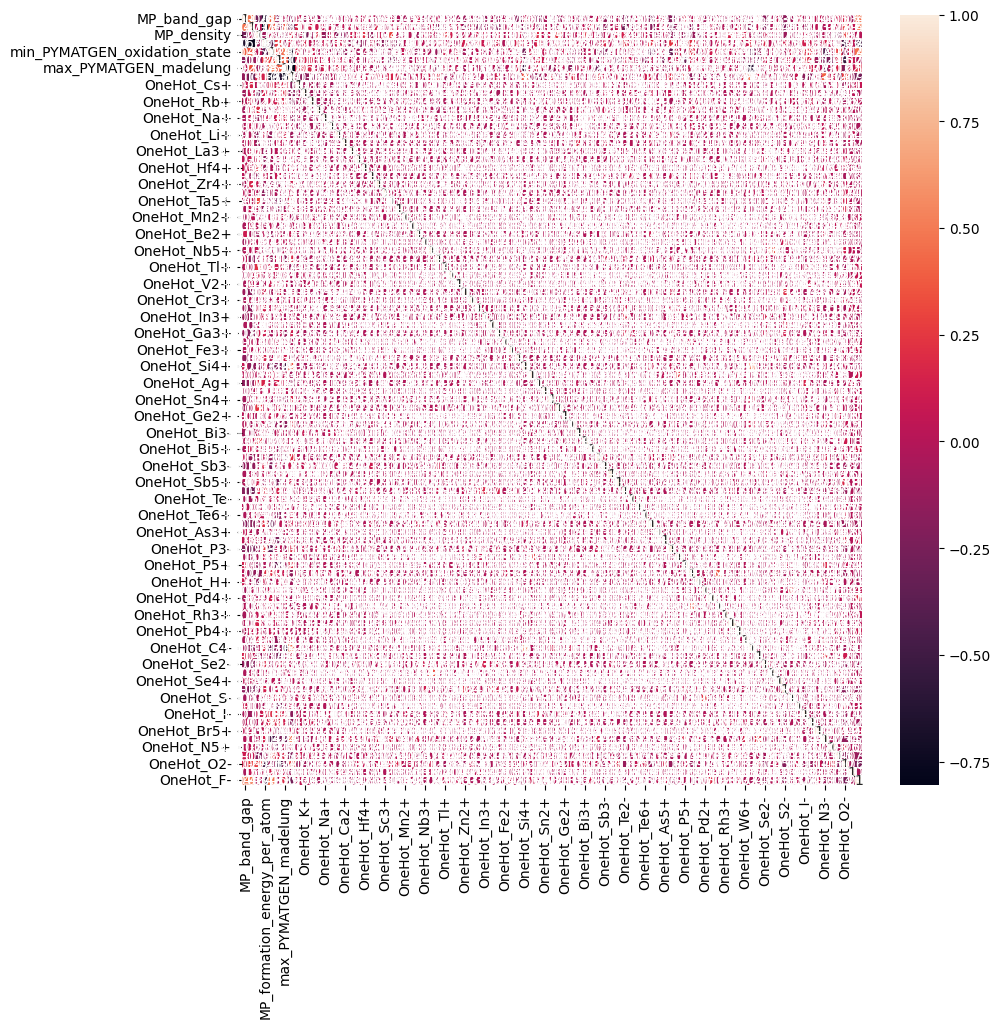

In [ ]:
# ww will get highly correlated features
# it will remove the first feature that is correlated with anything other feature
plt.figure(figsize=(10,10))
sns.heatmap(X_train1.corr(),cbar=True,annot=True)


<Axes: >

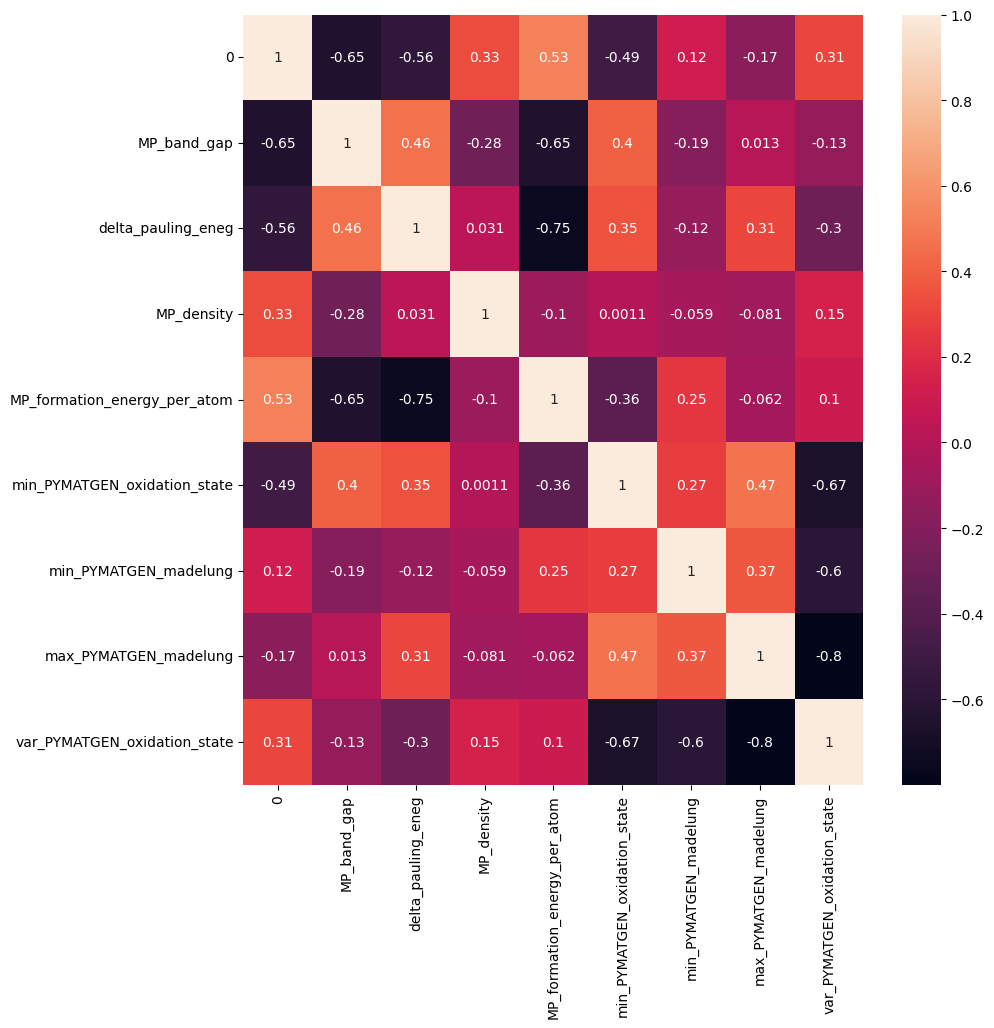

In [ ]:
# ww will get highly correlated features
# it will remove the first feature that is correlated with anything other feature
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),cbar=True,annot=True)


In [ ]:
def corr(x, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = x.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
X_train1.shape

(1055, 93)

In [ ]:
y_train1.shape

(1055,)

In [ ]:
X_test1.shape

(309, 93)

In [ ]:
y_test1.shape

(309,)

In [ ]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_train1,y_train1)

LinearRegression()

In [ ]:
lin_reg.score(X_test1,y_test1)

0.7042013219079294

In [ ]:
lin_reg.score(X_train1,y_train1)

0.837746193666534

In [ ]:
y_pred=lin_reg.predict(X_test1)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


r2 = r2_score(y_test1, y_pred)
print(r2)

mse = mean_squared_error(y_test1, y_pred)
print(mse)

mape = mean_absolute_percentage_error(y_test1, y_pred)
print(mape)

0.7042013219079294
2.4115265006936895
0.1846482751768592


In [ ]:
scores_lin_reg = cross_validate(lin_reg, X_train1, y_train1, cv=5,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
print(scores_lin_reg['train_r2'])
scores_lin_reg['train_r2'].mean()
reg_pred=lin_reg.predict(X_train1)

[0.86733557 0.83752729 0.86670464 0.84831714 0.81490466]


In [ ]:
scores_lin_reg = cross_validate(lin_reg, X_test1, y_test1, cv=5,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
print(scores_lin_reg['test_r2'])
scores_lin_reg['test_r2'].mean()
reg_pred=lin_reg.predict(X_test1)


[-1.05482204e+23 -3.95232196e+23 -1.40975555e+23  5.98818817e-01
 -2.00635224e+23]


Text(0.5, 1.0, 'Error Distribution')

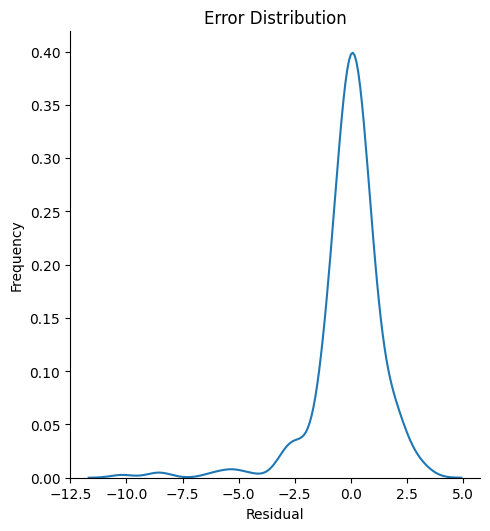

In [ ]:
import seaborn as sns
residual=reg_pred-y_test1
sns.displot(residual,kind='kde')
plt.ylabel('Frequency')
plt.xlabel('Residual')
plt.title('Error Distribution')

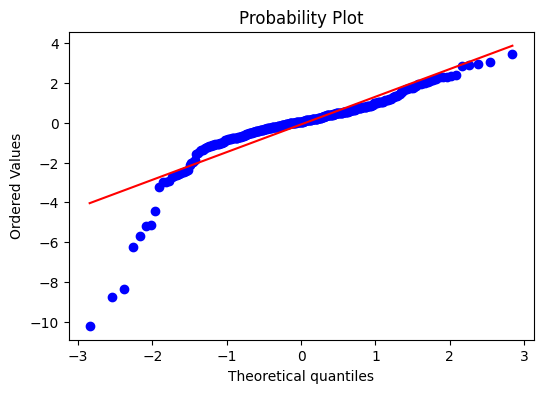

In [ ]:
# QQ Plot

import scipy as sp


fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

In [ ]:
import sklearn.metrics as metrics
# calculate manually
d = y_test1-reg_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((reg_pred-np.mean(y_test))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("r2:",r2_f)

Results by manual calculation:
MAE: 0.9378534089526042
MSE: 2.4115265006936895
RMSE: 1.5529090445656144
r2: 0.6165943117640436


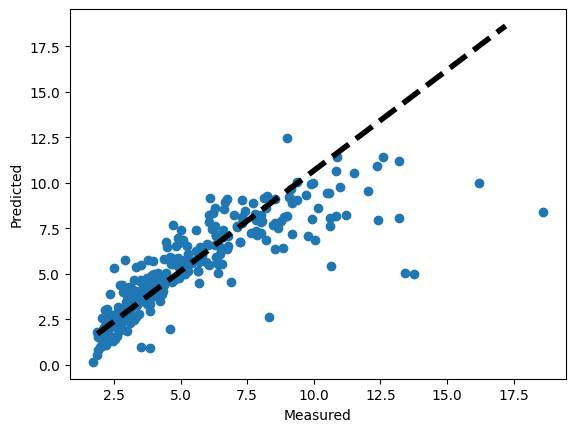

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test1,reg_pred)
ax.plot([y_test.min(), y_test.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_regressor=Lasso()
lasso_regressor

Lasso()

In [ ]:
parameters={'alpha':[0.001,0.1,0.4,0.6,0.8,1,2,2.7,2.8,3,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train1,y_train1)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.1, 0.4, 0.6, 0.8, 1, 2, 2.7, 2.8, 3,
                                   10, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassocv.best_params_)

{'alpha': 0.001}


In [ ]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=0.001)
lasso_reg.fit(X_train1,y_train1)

Lasso(alpha=0.001)

In [ ]:
lasso_reg.score(X_test1,y_test1)

0.740996664938756

In [ ]:
lasso_reg.score(X_train1,y_train1)

0.8349965813299315

In [ ]:
y_pred=lasso_reg_pred=lasso_reg.predict(X_test1)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


r2 = r2_score(y_test1, y_pred)
print(r2)

mse = mean_squared_error(y_test1, y_pred)
print(mse)

mape = mean_absolute_percentage_error(y_test1, y_pred)
print(mape)

0.740996664938756
2.111549011296883
0.17410435263180138


In [ ]:

# Create a Lasso regression object with alpha = 0.1
lasso = Lasso(alpha=0.001)

# Fit the Lasso regression model on the training data
lasso.fit(X_train1, y_train1)

# Predict the test data using the fitted model
y_pred = lasso.predict(X_test1)



# Extract the coefficients and their corresponding feature names
coef = lasso.coef_
feature_names_lasso = X_train1.columns

# Print the coefficients and their corresponding feature names
for feature, coef in zip(feature_names_lasso, coef):
    print(coef)

-0.41831593667604516
-0.07071931996070815
1.1536386711767266
-0.155261871358269
-0.2849924945572988
-0.18558058750093426
0.1218826819862884
0.2644458811473929
-1.9932799506869956
-1.7030231621149317
-2.036950336879762
-0.74434408464794
-0.8695351251622888
-0.7682240478641993
0.0
-0.2896792484338784
-0.22276760794910092
0.3611355421514864
-1.8692734946877403
-0.47545168303443686
2.587029017099762
2.273150104683642
-0.739614123800201
3.493463304146036
-0.40616897515726613
5.0576202820901175
0.060042315622753945
8.274157733175358
1.0967133868956593
-0.46083053199788576
-0.8164006853576632
-0.24552169073097344
-0.0
0.16949384930842168
2.6984460414663713
-0.0
-0.0
-0.5076264734133077
0.011796341307390323
-0.0
1.54893037501503
0.6943131628455028
-0.613545391082655
2.987746563631829
0.4049607226951812
1.5758781162541147
0.0
-1.6282909227344367
3.503426473621475
-0.5983338042192073
5.452776684055192
1.2672580619327198
-0.0
-0.26142963848282547
5.144359755802237
3.2159609354227885
-0.9156316190

Text(0.5, 1.0, 'Error Distribution')

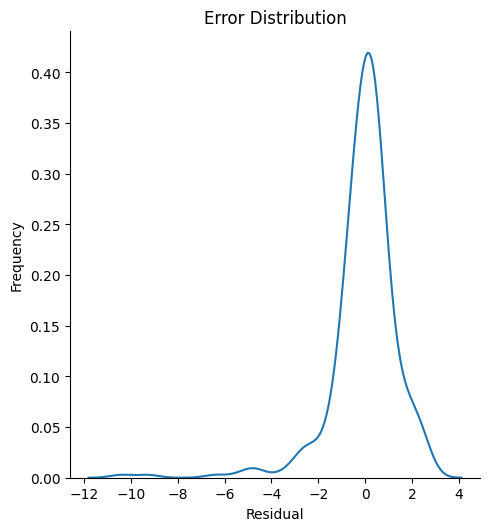

In [ ]:
import seaborn as sns
residual=lasso_reg_pred-y_test1
sns.displot(residual,kind='kde')
plt.ylabel('Frequency')
plt.xlabel('Residual')
plt.title('Error Distribution')

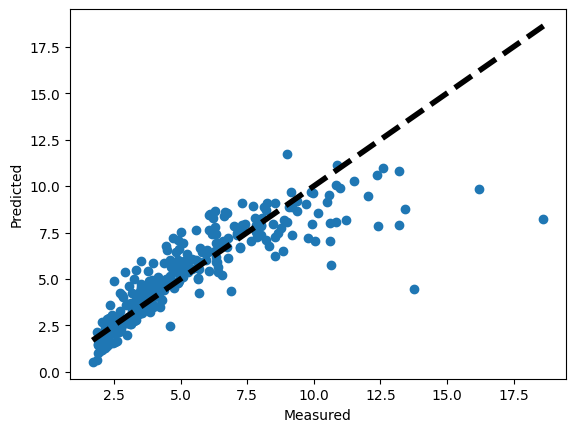

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test1,lasso_reg_pred)
ax.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
import sklearn.metrics as metrics
# calculate manually
lasso_pred=lasso.predict(X_test1)
d = y_test1-lasso_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)

Results by manual calculation:
MAE: 0.8908502010739331
MSE: 2.111549011296883
RMSE: 1.4531169984887256


In [ ]:
svr=SVR()
svr.fit(X_train1,y_train1)

SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'C': [10, 15,20,30,40,50,100,150],'kernel': ['rbf','linear','poly']}
svr_cv = GridSearchCV(svr, parameters, refit = True, verbose = 3)
svr_cv.fit(X_train1,y_train1)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..................C=10, kernel=rbf;, score=0.771 total time=   0.1s
[CV 2/5] END ..................C=10, kernel=rbf;, score=0.937 total time=   0.1s
[CV 3/5] END ..................C=10, kernel=rbf;, score=0.780 total time=   0.1s
[CV 4/5] END ..................C=10, kernel=rbf;, score=0.857 total time=   0.1s
[CV 5/5] END ..................C=10, kernel=rbf;, score=0.872 total time=   0.1s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.707 total time=   0.4s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.875 total time=   0.4s
[CV 3/5] END ...............C=10, kernel=linear;, score=0.692 total time=   0.5s
[CV 4/5] END ...............C=10, kernel=linear;, score=0.770 total time=   0.9s
[CV 5/5] END ...............C=10, kernel=linear;, score=0.812 total time=   0.7s
[CV 1/5] END .................C=10, kernel=poly;, score=0.434 total time=   0.3s
[CV 2/5] END .................C=10, kernel=poly

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10, 15, 20, 30, 40, 50, 100, 150],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [ ]:
 #print best parameter after tuning
print(svr_cv.best_params_)

# print how our model looks after hyper-parameter tuning
print(svr_cv.best_estimator_)

{'C': 30, 'kernel': 'rbf'}
SVR(C=30)


In [ ]:
svr2 =SVR(C=30,kernel='rbf')

In [ ]:
svr2.fit(X_train1,y_train1)

SVR(C=30)

In [ ]:
svr2.score(X_test1,y_test1)

0.8711668916544687

In [ ]:
svr2.score(X_train1,y_train1)

0.9746351914564514

In [ ]:
y_pred=svr2.predict(X_test1)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


r2 = r2_score(y_test1, y_pred)
print(r2)

mse = mean_squared_error(y_test1, y_pred)
print(mse)

mape = mean_absolute_percentage_error(y_test1, y_pred)
print(mape)

0.8711668916544687
1.0503240141096437
0.08309116329558179


In [ ]:
df.columns

Index([                             0,                  'MP_band_gap',
                 'delta_pauling_eneg',                   'MP_density',
       'MP_formation_energy_per_atom', 'min_PYMATGEN_oxidation_state',
              'min_PYMATGEN_madelung',        'max_PYMATGEN_madelung',
       'var_PYMATGEN_oxidation_state',                   'OneHot_Cs+',
                          'OneHot_K+',                   'OneHot_Rb+',
                        'OneHot_Ba2+',                   'OneHot_Na+',
                        'OneHot_Sr2+',                   'OneHot_Li+',
                        'OneHot_Ca2+',                  'OneHot_La3+',
                         'OneHot_Y3+',                  'OneHot_Hf4+',
                        'OneHot_Mg2+',                  'OneHot_Zr4+',
                        'OneHot_Sc3+',                  'OneHot_Ta5+',
                        'OneHot_Ti4+',                  'OneHot_Mn2+',
                        'OneHot_Mn4+',                  'OneHot_Be2+',
      

                         Feature      Weight
2                     MP_density  121.427027
0                    MP_band_gap  101.441555
7   var_PYMATGEN_oxidation_state   95.324930
3   MP_formation_energy_per_atom   66.955890
4   min_PYMATGEN_oxidation_state   61.374311
1             delta_pauling_eneg   57.096556
6          max_PYMATGEN_madelung   35.211295
47                   OneHot_Hg2+   32.389889
90                    OneHot_O2-   28.769083
92                     OneHot_F-   26.969328
27                   OneHot_Nb3+   22.465919
21                   OneHot_Sc3+   22.410963
23                   OneHot_Ti4+   22.229667
65                     OneHot_P-   21.661486
73                   OneHot_Pb2+   18.601611


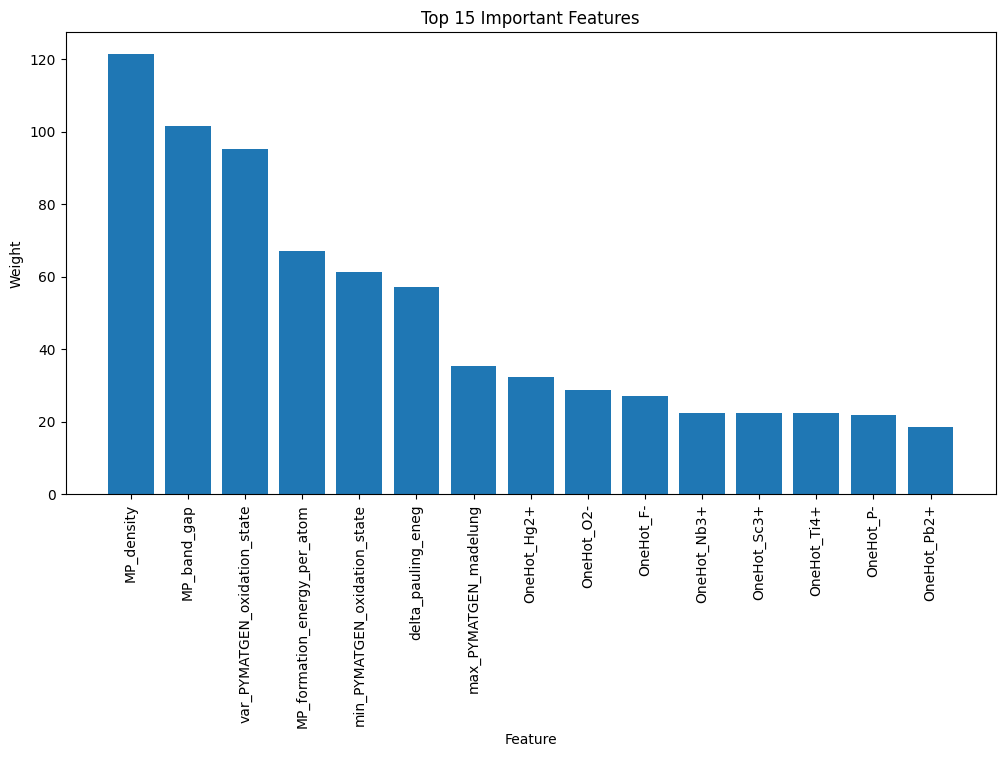

In [ ]:
from sklearn.svm import SVR
import pandas as pd



# Train the model
svr2.fit(X_train1, y_train1)

# Get the feature weights (coefficients)
dual_coef = svr2.dual_coef_[0]
support_vectors = svr2.support_vectors_
feature_weights = abs((dual_coef @ support_vectors).reshape(-1))

# Create a DataFrame with feature names and weights
weights_df = pd.DataFrame({'Feature': X_train1.columns, 'Weight': feature_weights})

# Sort the DataFrame by weight in descending order
weights_df = weights_df.sort_values('Weight', ascending=False)

# Get the top 15 features
top_15_features = weights_df.head(15)

# Print the top 15 features
print(top_15_features)

# Plot the top 15 important features
plt.figure(figsize=(12, 6))
plt.bar(top_15_features['Feature'], top_15_features['Weight'])
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Top 15 Important Features')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Permutation Importance')

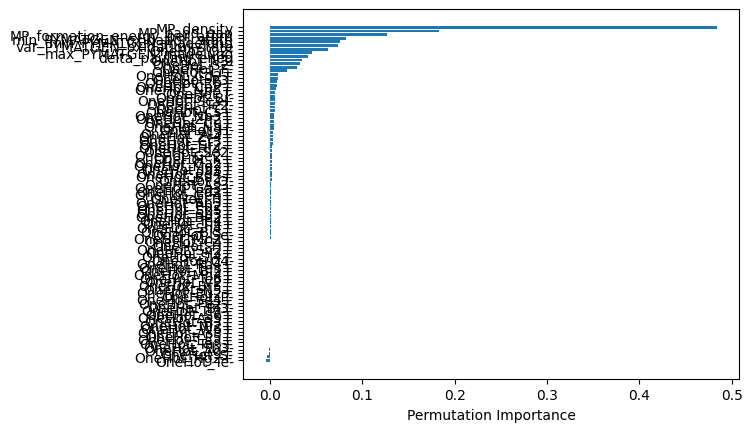

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc =  SVR(kernel='rbf', C=30)
svc.fit(X_train1, y_train1)

perm_importance = permutation_importance(svc, X_test1, y_test1)

feature_names = [ 'MP_band_gap','delta_pauling_eneg','MP_density','MP_formation_energy_per_atom', 'min_PYMATGEN_oxidation_state',
  'min_PYMATGEN_madelung','max_PYMATGEN_madelung','var_PYMATGEN_oxidation_state','OneHot_Cs+',
                          'OneHot_K+',    'OneHot_Rb+',
                        'OneHot_Ba2+',       'OneHot_Na+',
                        'OneHot_Sr2+',    'OneHot_Li+',
                        'OneHot_Ca2+', 'OneHot_La3+',
                         'OneHot_Y3+',  'OneHot_Hf4+',
                        'OneHot_Mg2+', 'OneHot_Zr4+',
                        'OneHot_Sc3+',  'OneHot_Ta5+',
                        'OneHot_Ti4+','OneHot_Mn2+',
                        'OneHot_Mn4+',                  'OneHot_Be2+',
                        'OneHot_Nb3+',                  'OneHot_Nb5+',
                        'OneHot_Al3+',                   'OneHot_Tl+',
                        'OneHot_Tl3+',                   'OneHot_V2+',
                        'OneHot_Zn2+',                  'OneHot_Cr3+',
                        'OneHot_Cd2+',                  'OneHot_In3+',
                        'OneHot_Ga2+',                  'OneHot_Ga3+',
                        'OneHot_Fe2+',                  'OneHot_Fe3+',
                         'OneHot_Cu+',                  'OneHot_Si4+',
                        'OneHot_Ni2+',                   'OneHot_Ag+',
                        'OneHot_Sn2+',                  'OneHot_Sn4+',
                        'OneHot_Hg2+',                  'OneHot_Ge2+',
                        'OneHot_Ge4+',                  'OneHot_Bi3-',
                        'OneHot_Bi3+',                  'OneHot_Bi5+',
                         'OneHot_B3+',                  'OneHot_Sb3-',
                        'OneHot_Sb3+',                  'OneHot_Sb5+',
                        'OneHot_Te2-',                   'OneHot_Te-',
                        'OneHot_Te4+',                  'OneHot_Te6+',
                        'OneHot_As3-',                  'OneHot_As3+',
                        'OneHot_As5+',                   'OneHot_P3-',
                          'OneHot_P-',                   'OneHot_P5+',
                          'OneHot_H-',                    'OneHot_H+',
                        'OneHot_Pd2+',                  'OneHot_Pd4+',
                        'OneHot_Ru2+',                  'OneHot_Rh3+',
                        'OneHot_Pb2+',                  'OneHot_Pb4+',
                         'OneHot_W6+',                   'OneHot_C4-',
                         'OneHot_C4+',                  'OneHot_Se2-',
                         'OneHot_Se-',                  'OneHot_Se4+',
                         'OneHot_S2-',                    'OneHot_S-',
                         'OneHot_S6+',                    'OneHot_I-',
                         'OneHot_Br-',                  'OneHot_Br5+',
                         'OneHot_N3-',                   'OneHot_N5+',
                         'OneHot_Cl-',                   'OneHot_O2-',
                          'OneHot_O-',                    'OneHot_F-']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [ ]:
svr_pred=svr2.predict(X_test1)

In [ ]:
!pip install shapash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.7/652.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.8 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=0829031f35bc850ab990081f3cc21584a53221743067d8909d75c1cdcdfc763e
  Stored

In [ ]:
#from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
#import shap
#shap.initjs()

In [ ]:
#explainer = shap.Explainer(svr2.predict, X_train1)
#shap_values = explainer(X_test1)

In [ ]:
#def sample_feature_importance(idx, type='condensed'):
    #if type == 'condensed':
        #return shap.plots.force(shap_values[idx])
    #elif type == 'waterfall':
        #return shap.plots.waterfall(shap_values[idx])
    #else:
        #return "Return valid visual ('condensed', 'waterfall')"

In [ ]:
#sample_feature_importance(0, 'waterfall')

In [ ]:
#shap.plots.bar(shap_values)

In [ ]:
#shap.summary_plot(shap_values.values, X_train1, plot_type='bar')

In [ ]:
import sklearn.metrics as metrics
# calculate manually
svr_pred=svr.predict(X_test1)
d = y_test1-svr_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)

Results by manual calculation:
MAE: 0.6300587074183812
MSE: 1.6161208645822391
RMSE: 1.2712674244950348


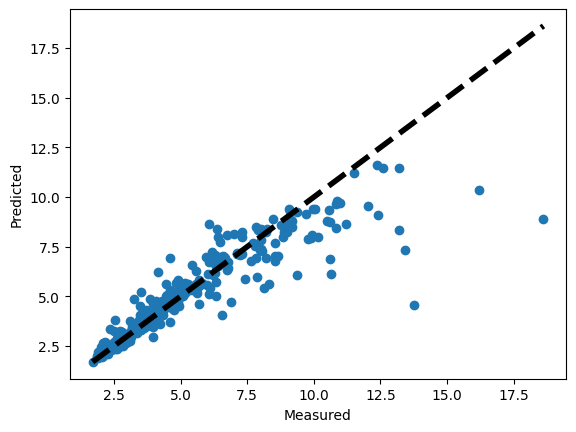

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test1,svr_pred)
ax.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

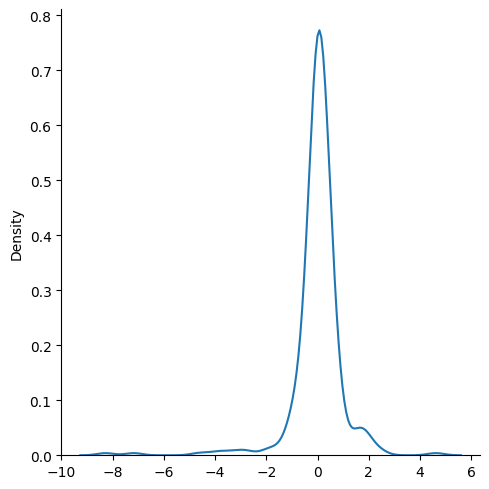

In [ ]:
import seaborn as sns
svr_pred=svr2.predict(X_test1)
sns.displot(svr_pred.flatten()-y_test1,kind='kde')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train1, y_train1)
y_pred_tree = tree.predict(X_test1)
mse_dt = mean_squared_error(y_test1, y_pred_tree)
mae_dt = mean_absolute_error(y_test1, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  2.5916102903495304
Mean absolute error using decision tree:  0.9455967986235801


In [ ]:
tree.score(X_test1, y_test1)

0.6821121817261047

In [ ]:
Dt=DecisionTreeRegressor()
Dt.fit(X_train1,y_train1)

DecisionTreeRegressor()

In [ ]:
Dt_pred=Dt.predict(X_test1)

In [ ]:
y_pred=Dt.predict(X_test1)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


r2 = r2_score(y_test1, y_pred)
print(r2)

mse = mean_squared_error(y_test1, y_pred)
print(mse)

mape = mean_absolute_percentage_error(y_test1, y_pred)
print(mape)

0.6765842431061428
2.636677329060557
0.1648761607808931


In [ ]:
Dt.score(X_test1,y_test1)

0.6765842431061428

In [ ]:
Dt.score(X_train1,y_train1)

1.0

In [ ]:
import sklearn.metrics as metrics
# calculate manually
Dt_pred=Dt.predict(X_test1)
d = y_test1-Dt_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)

Results by manual calculation:
MAE: 0.9651013832379457
MSE: 2.636677329060557
RMSE: 1.6237848777041117


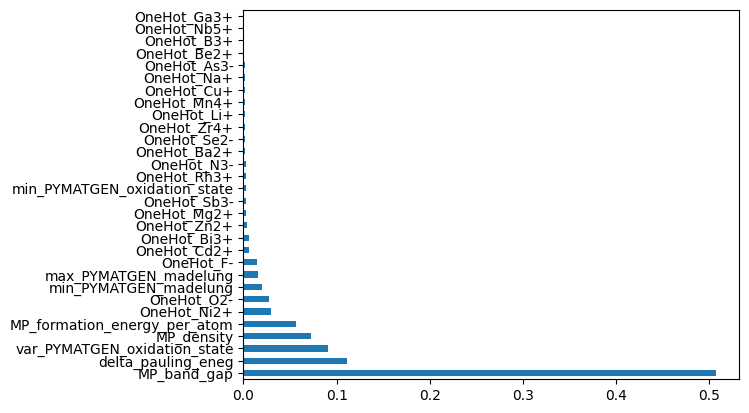

In [ ]:
feat_importances = pd.Series(Dt.feature_importances_, index=X_train1.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

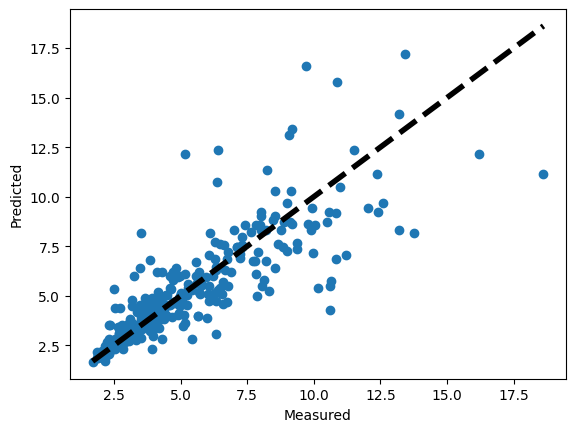

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test1,Dt_pred)
ax.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

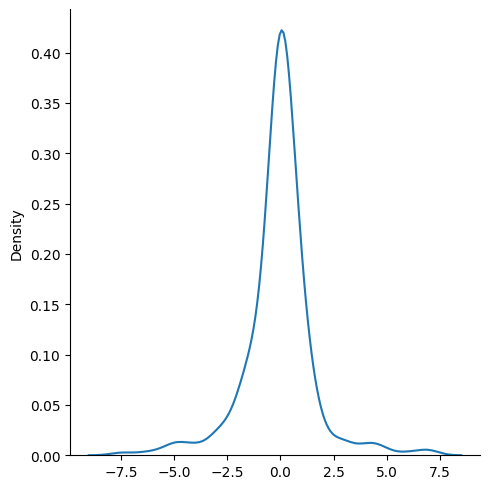

In [ ]:
import seaborn as sns
Dt_pred=Dt.predict(X_test1)
sns.displot(Dt_pred.flatten()-y_test1,kind='kde')

In [ ]:
Rf=RandomForestRegressor()
Rf.fit(X_train1,y_train1)

RandomForestRegressor()

In [ ]:
Rf.score(X_test1,y_test1)

0.799644245361312

In [ ]:
Rf.score(X_train1,y_train1)

0.9717563546666355

In [ ]:
Rf_pred=Rf.predict(X_test1)

In [ ]:
y_test1.shape

(309,)

In [ ]:
Rf_pred.shape

(309,)

In [ ]:
X_test1.shape

(309, 93)

In [ ]:
y_pred=Rf.predict(X_test1)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


r2 = r2_score(y_test1, y_pred)
print(r2)

mse = mean_squared_error(y_test1, y_pred)
print(mse)

mape = mean_absolute_percentage_error(y_test1, y_pred)
print(mape)

0.799644245361312
1.6334191044873052
0.1339189999490133


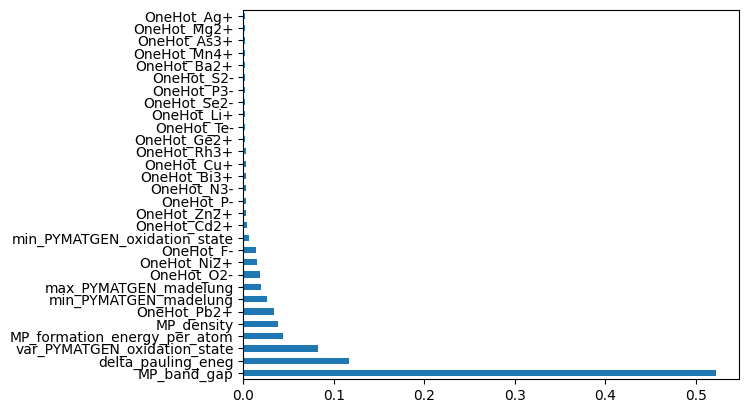

In [ ]:
feat_importances = pd.Series(Rf.feature_importances_, index=X_train1.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [ ]:
import sklearn.metrics as metrics
# calculate manually
Rf_pred=Rf.predict(X_test1)
d = y_test1-Rf_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)

Results by manual calculation:
MAE: 0.747475603159003
MSE: 1.6334078548158255
RMSE: 1.2780484555821134


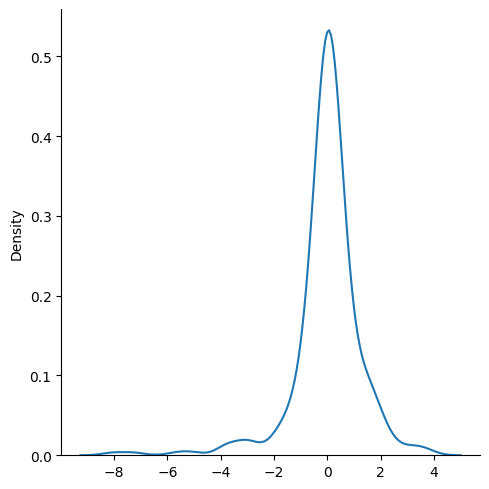

In [ ]:
import seaborn as sns
Rf_pred=Rf.predict(X_test1)
sns.displot(Rf_pred.flatten()-y_test1,kind='kde')

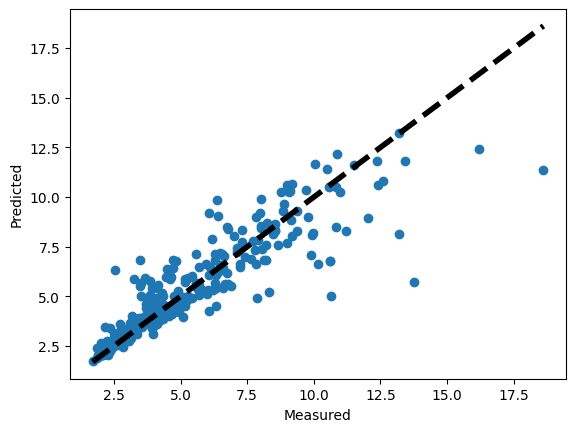

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test1,Rf_pred)
ax.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
##from sklearn.metrics import mean_squared_error

# define the hyperparameter grid
#param_grid = {
    #'n_estimators': [100, 150,200],
    #'max_depth': [None,1,2, 5,10,15],
    #'min_samples_split': [2,3,5],
    #'min_samples_leaf':[1,2,4,6,9],
    #'min_weight_fraction_leaf':[0,0.2,0.4,0.7]
#}


# create a random forest regressor object
#rf = RandomForestRegressor(random_state=42)


# create a grid search object
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# start the timer
#grid_search.fit(X_train1, y_train1)
# end the timer


# extract the best hyperparameters
#best_params = grid_search.best_params_

# train a random forest regressor with the best hyperparameters
#rf = RandomForestRegressor(random_state=42, **best_params)
#rf.fit(X_train1, y_train1)

# make predictions on the test set
#y_pred = rf.predict(X_test1)

# evaluate the model using mean squared error
#mse = mean_squared_error(y_test1, y_pred)
#print("Mean squared error: {:.2f}".format(mse))


In [ ]:
Rf.score(X_train1, y_train1)

0.9709434916606908

In [ ]:
Rf.score(X_test1, y_test1)

0.7996456252499227

In [ ]:
#best_params

In [ ]:
Rf.score(X_test1, y_test1)

0.7996456252499227

In [ ]:
X_train.shape

(1091, 93)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


# Build the model
model = keras.Sequential([
    keras.layers.Dense(X_train.shape[1], activation='relu'),
    keras.layers.Dense(96, activation='relu'),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1,activation='linear')
    #keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(X_train1, y_train1, epochs=400, validation_split=0.2)

# Evaluate the model on test data
y_pred = model.predict(X_test1)

mae = mean_absolute_error(y_test1, y_pred)

r2 = r2_score(y_test1, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)


Epoch 1/400
27/27 [==============================] - 3s 15ms/step - loss: 21.2818 - mae: 3.6057 - val_loss: 8.0212 - val_mae: 1.9038
Epoch 2/400
27/27 [==============================] - 0s 5ms/step - loss: 4.8806 - mae: 1.4169 - val_loss: 3.1885 - val_mae: 1.3233
Epoch 3/400
27/27 [==============================] - 0s 6ms/step - loss: 2.8892 - mae: 1.0447 - val_loss: 2.9944 - val_mae: 1.1513
Epoch 4/400
27/27 [==============================] - 0s 5ms/step - loss: 2.2574 - mae: 0.9046 - val_loss: 2.5529 - val_mae: 1.1663
Epoch 5/400
27/27 [==============================] - 0s 5ms/step - loss: 2.2551 - mae: 0.8792 - val_loss: 1.6197 - val_mae: 0.8823
Epoch 6/400
27/27 [==============================] - 0s 5ms/step - loss: 1.5252 - mae: 0.7054 - val_loss: 1.5259 - val_mae: 0.8319
Epoch 7/400
27/27 [==============================] - 0s 7ms/step - loss: 1.3150 - mae: 0.6505 - val_loss: 1.3691 - val_mae: 0.7419
Epoch 8/400
27/27 [==============================] - 0s 9ms/step - loss: 1.0685 -

In [ ]:
nn_pred=model.predict(X_test1)

10/10 [==============================] - 0s 2ms/step


In [ ]:
nn_pred.shape

(309, 1)

In [ ]:
r2 = r2_score(y_test1, nn_pred)
r2

0.8992389582939535

In [ ]:
y_pred=model.predict(X_train1)

33/33 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


r2 = r2_score(y_test1, y_pred)
print(r2)

mse = mean_squared_error(y_test1, y_pred)
print(mse)

mape = mean_absolute_percentage_error(y_test1, y_pred)
print(mape)

ValueError: ignored

In [ ]:
explainer = shap.Explainer(model.predict, X_train1)
shap_values = explainer(X_test1)

80/80 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 6/309 [00:00<?, ?it/s]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 8/309 [00:11<02:54,  1.72it/s]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 9/309 [00:13<04:28,  1.12it/s]

76/76 [==============================] - 0s 3ms/step


Permutation explainer:   3%|▎         | 10/309 [00:14<05:52,  1.18s/it]

73/73 [==============================] - 0s 3ms/step


Permutation explainer:   4%|▎         | 11/309 [00:16<06:44,  1.36s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 12/309 [00:17<06:09,  1.24s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 13/309 [00:18<05:49,  1.18s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▍         | 14/309 [00:19<05:47,  1.18s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▍         | 15/309 [00:21<06:11,  1.26s/it]

87/87 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 16/309 [00:22<06:12,  1.27s/it]

70/70 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 17/309 [00:24<06:54,  1.42s/it]

66/66 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 18/309 [00:25<07:21,  1.52s/it]

71/71 [==============================] - 0s 3ms/step


Permutation explainer:   6%|▌         | 19/309 [00:27<07:15,  1.50s/it]

74/74 [==============================] - 0s 3ms/step


Permutation explainer:   6%|▋         | 20/309 [00:29<07:32,  1.57s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 21/309 [00:30<07:29,  1.56s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 22/309 [00:31<07:04,  1.48s/it]

83/83 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 23/309 [00:33<06:52,  1.44s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 24/309 [00:34<06:41,  1.41s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 25/309 [00:36<06:44,  1.43s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 26/309 [00:37<06:47,  1.44s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▊         | 27/309 [00:38<06:42,  1.43s/it]

71/71 [==============================] - 0s 3ms/step


Permutation explainer:   9%|▉         | 28/309 [00:40<06:41,  1.43s/it]

80/80 [==============================] - 0s 3ms/step


Permutation explainer:   9%|▉         | 29/309 [00:41<06:55,  1.48s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  10%|▉         | 30/309 [00:43<07:08,  1.53s/it]

68/68 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 31/309 [00:44<06:33,  1.42s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 32/309 [00:46<06:20,  1.37s/it]

85/85 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 33/309 [00:47<06:09,  1.34s/it]

74/74 [==============================] - 0s 3ms/step


Permutation explainer:  11%|█         | 34/309 [00:48<06:12,  1.36s/it]

78/78 [==============================] - 0s 3ms/step


Permutation explainer:  11%|█▏        | 35/309 [00:50<06:39,  1.46s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 36/309 [00:51<06:35,  1.45s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 37/309 [00:53<06:35,  1.45s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 38/309 [00:54<06:44,  1.49s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  13%|█▎        | 39/309 [00:56<06:44,  1.50s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  13%|█▎        | 40/309 [00:57<06:46,  1.51s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  13%|█▎        | 41/309 [00:59<06:37,  1.48s/it]

68/68 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▎        | 42/309 [01:00<06:06,  1.37s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 43/309 [01:01<06:09,  1.39s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 44/309 [01:03<05:59,  1.36s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▍        | 45/309 [01:04<05:51,  1.33s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▍        | 46/309 [01:05<05:58,  1.36s/it]

70/70 [==============================] - 0s 3ms/step


Permutation explainer:  15%|█▌        | 47/309 [01:07<06:02,  1.38s/it]

76/76 [==============================] - 0s 3ms/step


Permutation explainer:  16%|█▌        | 48/309 [01:08<06:22,  1.46s/it]

83/83 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 49/309 [01:10<06:18,  1.45s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 50/309 [01:11<05:54,  1.37s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 51/309 [01:12<05:46,  1.34s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 52/309 [01:14<06:00,  1.40s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 53/309 [01:15<05:48,  1.36s/it]

83/83 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 54/309 [01:17<05:52,  1.38s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 55/309 [01:18<05:33,  1.31s/it]

77/77 [==============================] - 0s 3ms/step


Permutation explainer:  18%|█▊        | 56/309 [01:19<05:42,  1.35s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 57/309 [01:21<06:07,  1.46s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 58/309 [01:22<06:20,  1.52s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 59/309 [01:24<05:55,  1.42s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 60/309 [01:25<05:53,  1.42s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█▉        | 61/309 [01:27<06:02,  1.46s/it]

68/68 [==============================] - 0s 2ms/step


Permutation explainer:  20%|██        | 62/309 [01:28<05:45,  1.40s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  20%|██        | 63/309 [01:29<05:24,  1.32s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██        | 64/309 [01:30<05:31,  1.35s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██        | 65/309 [01:32<05:34,  1.37s/it]

70/70 [==============================] - 0s 3ms/step


Permutation explainer:  21%|██▏       | 66/309 [01:34<05:50,  1.44s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 67/309 [01:35<06:07,  1.52s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 68/309 [01:37<05:58,  1.49s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 69/309 [01:38<05:41,  1.42s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 70/309 [01:39<05:28,  1.37s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 71/309 [01:41<05:29,  1.39s/it]

69/69 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 72/309 [01:42<05:22,  1.36s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▎       | 73/309 [01:43<05:17,  1.34s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 74/309 [01:44<05:09,  1.32s/it]

75/75 [==============================] - 0s 3ms/step


Permutation explainer:  24%|██▍       | 75/309 [01:46<05:11,  1.33s/it]

78/78 [==============================] - 0s 3ms/step


Permutation explainer:  25%|██▍       | 76/309 [01:47<05:26,  1.40s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▍       | 77/309 [01:49<05:30,  1.43s/it]

85/85 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▌       | 78/309 [01:50<05:15,  1.37s/it]

89/89 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 79/309 [01:52<05:19,  1.39s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 80/309 [01:53<05:20,  1.40s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 81/309 [01:54<05:11,  1.37s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 82/309 [01:55<04:55,  1.30s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 83/309 [01:57<04:43,  1.25s/it]

83/83 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 84/309 [01:58<04:36,  1.23s/it]

68/68 [==============================] - 0s 3ms/step


Permutation explainer:  28%|██▊       | 85/309 [01:59<04:57,  1.33s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 86/309 [02:01<05:16,  1.42s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 87/309 [02:02<05:17,  1.43s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 88/309 [02:03<04:56,  1.34s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 89/309 [02:05<04:42,  1.28s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 90/309 [02:06<04:57,  1.36s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 91/309 [02:08<04:58,  1.37s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██▉       | 92/309 [02:09<04:52,  1.35s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  30%|███       | 93/309 [02:10<04:39,  1.29s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  30%|███       | 94/309 [02:11<04:27,  1.24s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 95/309 [02:13<04:45,  1.33s/it]

71/71 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███       | 96/309 [02:14<04:57,  1.40s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███▏      | 97/309 [02:16<05:01,  1.42s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 98/309 [02:17<04:50,  1.37s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 99/309 [02:19<04:58,  1.42s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 100/309 [02:20<04:37,  1.33s/it]

70/70 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 101/309 [02:21<04:40,  1.35s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 102/309 [02:22<04:42,  1.36s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 103/309 [02:24<04:36,  1.34s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▎      | 104/309 [02:25<04:30,  1.32s/it]

73/73 [==============================] - 0s 3ms/step


Permutation explainer:  34%|███▍      | 105/309 [02:26<04:38,  1.37s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 106/309 [02:28<04:45,  1.41s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 107/309 [02:29<04:37,  1.37s/it]

72/72 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 108/309 [02:30<04:28,  1.33s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 109/309 [02:31<04:07,  1.24s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 110/309 [02:33<03:59,  1.20s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 111/309 [02:34<04:18,  1.30s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 112/309 [02:36<04:22,  1.33s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 113/309 [02:37<04:33,  1.39s/it]

64/64 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 114/309 [02:39<04:36,  1.42s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 115/309 [02:40<04:44,  1.47s/it]

83/83 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 116/309 [02:42<04:44,  1.47s/it]

69/69 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 117/309 [02:43<04:29,  1.40s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 118/309 [02:44<04:21,  1.37s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▊      | 119/309 [02:45<03:56,  1.25s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 120/309 [02:46<03:59,  1.26s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 121/309 [02:48<03:57,  1.26s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 122/309 [02:49<03:57,  1.27s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  40%|███▉      | 123/309 [02:50<03:49,  1.23s/it]

83/83 [==============================] - 0s 3ms/step


Permutation explainer:  40%|████      | 124/309 [02:52<03:59,  1.29s/it]

81/81 [==============================] - 0s 3ms/step


Permutation explainer:  40%|████      | 125/309 [02:53<04:18,  1.40s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 126/309 [02:55<04:26,  1.46s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 127/309 [02:56<04:07,  1.36s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████▏     | 128/309 [02:57<03:47,  1.26s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 129/309 [02:58<03:49,  1.27s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 130/309 [02:59<03:42,  1.24s/it]

68/68 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 131/309 [03:01<03:49,  1.29s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 132/309 [03:02<03:40,  1.25s/it]

82/82 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 133/309 [03:03<03:38,  1.24s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 134/309 [03:05<03:47,  1.30s/it]

78/78 [==============================] - 0s 3ms/step


Permutation explainer:  44%|████▎     | 135/309 [03:06<04:00,  1.38s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 136/309 [03:08<04:26,  1.54s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 137/309 [03:10<04:25,  1.54s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▍     | 138/309 [03:11<04:23,  1.54s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▍     | 139/309 [03:13<04:09,  1.47s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▌     | 140/309 [03:14<03:51,  1.37s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 141/309 [03:15<03:52,  1.39s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 142/309 [03:17<03:53,  1.40s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▋     | 143/309 [03:18<03:42,  1.34s/it]

83/83 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 144/309 [03:19<03:55,  1.43s/it]

78/78 [==============================] - 0s 3ms/step


Permutation explainer:  47%|████▋     | 145/309 [03:21<04:04,  1.49s/it]

68/68 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 146/309 [03:22<03:39,  1.35s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 147/309 [03:23<03:37,  1.34s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 148/309 [03:25<03:32,  1.32s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 149/309 [03:26<03:28,  1.30s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▊     | 150/309 [03:27<03:13,  1.22s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 151/309 [03:28<03:27,  1.32s/it]

83/83 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 152/309 [03:30<03:25,  1.31s/it]

68/68 [==============================] - 0s 2ms/step


Permutation explainer:  50%|████▉     | 153/309 [03:31<03:15,  1.25s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  50%|████▉     | 154/309 [03:32<03:31,  1.36s/it]

71/71 [==============================] - 0s 3ms/step


Permutation explainer:  50%|█████     | 155/309 [03:34<03:44,  1.46s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 156/309 [03:36<03:41,  1.45s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 157/309 [03:37<03:25,  1.35s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 158/309 [03:38<03:23,  1.35s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████▏    | 159/309 [03:40<03:31,  1.41s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 160/309 [03:41<03:24,  1.37s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 161/309 [03:42<03:30,  1.42s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 162/309 [03:44<03:28,  1.42s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 163/309 [03:45<03:29,  1.44s/it]

78/78 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 164/309 [03:47<03:33,  1.47s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 165/309 [03:48<03:33,  1.48s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▎    | 166/309 [03:50<03:28,  1.46s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 167/309 [03:51<03:25,  1.45s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 168/309 [03:53<03:19,  1.42s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▍    | 169/309 [03:54<03:10,  1.36s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 170/309 [03:55<03:11,  1.38s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 171/309 [03:57<03:12,  1.39s/it]

79/79 [==============================] - 0s 3ms/step


Permutation explainer:  56%|█████▌    | 172/309 [03:58<03:16,  1.44s/it]

70/70 [==============================] - 0s 3ms/step


Permutation explainer:  56%|█████▌    | 173/309 [04:00<03:17,  1.45s/it]

64/64 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▋    | 174/309 [04:01<03:24,  1.52s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 175/309 [04:03<03:19,  1.49s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 176/309 [04:04<03:05,  1.39s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 177/309 [04:05<03:05,  1.40s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 178/309 [04:07<03:04,  1.40s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 179/309 [04:08<02:53,  1.34s/it]

82/82 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 180/309 [04:09<02:51,  1.33s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▊    | 181/309 [04:10<02:43,  1.28s/it]

77/77 [==============================] - 0s 3ms/step


Permutation explainer:  59%|█████▉    | 182/309 [04:12<02:47,  1.32s/it]

71/71 [==============================] - 0s 3ms/step


Permutation explainer:  59%|█████▉    | 183/309 [04:13<02:57,  1.41s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  60%|█████▉    | 184/309 [04:15<02:58,  1.43s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  60%|█████▉    | 185/309 [04:16<02:43,  1.31s/it]

66/66 [==============================] - 0s 2ms/step


Permutation explainer:  60%|██████    | 186/309 [04:17<02:35,  1.27s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 187/309 [04:18<02:32,  1.25s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 188/309 [04:19<02:29,  1.24s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 189/309 [04:21<02:35,  1.29s/it]

69/69 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████▏   | 190/309 [04:22<02:31,  1.27s/it]

82/82 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 191/309 [04:24<02:36,  1.33s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 192/309 [04:25<02:37,  1.35s/it]

76/76 [==============================] - 0s 3ms/step


Permutation explainer:  62%|██████▏   | 193/309 [04:27<02:44,  1.42s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 194/309 [04:28<02:51,  1.49s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 195/309 [04:29<02:37,  1.38s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 196/309 [04:31<02:36,  1.39s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 197/309 [04:32<02:34,  1.38s/it]

65/65 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 198/309 [04:33<02:31,  1.36s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 199/309 [04:35<02:23,  1.30s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▍   | 200/309 [04:36<02:19,  1.28s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▌   | 201/309 [04:37<02:10,  1.21s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▌   | 202/309 [04:38<02:22,  1.33s/it]

79/79 [==============================] - 0s 3ms/step


Permutation explainer:  66%|██████▌   | 203/309 [04:40<02:29,  1.41s/it]

82/82 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 204/309 [04:42<02:32,  1.45s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▋   | 205/309 [04:43<02:28,  1.43s/it]

70/70 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 206/309 [04:45<02:32,  1.48s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 207/309 [04:47<02:43,  1.60s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 208/309 [04:48<02:32,  1.51s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 209/309 [04:49<02:19,  1.40s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 210/309 [04:50<02:18,  1.40s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 211/309 [04:52<02:16,  1.39s/it]

76/76 [==============================] - 0s 3ms/step


Permutation explainer:  69%|██████▊   | 212/309 [04:53<02:22,  1.47s/it]

70/70 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 213/309 [04:55<02:21,  1.47s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 214/309 [04:56<02:13,  1.41s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  70%|██████▉   | 215/309 [04:57<02:01,  1.30s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  70%|██████▉   | 216/309 [04:59<02:03,  1.33s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  70%|███████   | 217/309 [05:00<02:01,  1.33s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 218/309 [05:01<01:55,  1.27s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 219/309 [05:02<01:55,  1.28s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 220/309 [05:03<01:50,  1.25s/it]

77/77 [==============================] - 0s 3ms/step


Permutation explainer:  72%|███████▏  | 221/309 [05:05<01:55,  1.32s/it]

80/80 [==============================] - 0s 3ms/step


Permutation explainer:  72%|███████▏  | 222/309 [05:07<02:00,  1.39s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 223/309 [05:08<02:08,  1.49s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 224/309 [05:10<02:04,  1.47s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 225/309 [05:11<02:02,  1.46s/it]

84/84 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 226/309 [05:13<02:00,  1.45s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 227/309 [05:14<01:52,  1.37s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 228/309 [05:15<01:50,  1.36s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 229/309 [05:16<01:46,  1.33s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 230/309 [05:18<01:44,  1.33s/it]

76/76 [==============================] - 0s 3ms/step


Permutation explainer:  75%|███████▍  | 231/309 [05:19<01:50,  1.41s/it]

77/77 [==============================] - 0s 3ms/step


Permutation explainer:  75%|███████▌  | 232/309 [05:21<01:55,  1.50s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 233/309 [05:22<01:53,  1.49s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 234/309 [05:24<01:50,  1.48s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 235/309 [05:25<01:43,  1.40s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▋  | 236/309 [05:26<01:36,  1.32s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 237/309 [05:27<01:34,  1.31s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 238/309 [05:29<01:30,  1.28s/it]

70/70 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 239/309 [05:30<01:29,  1.28s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 240/309 [05:31<01:28,  1.29s/it]

77/77 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 241/309 [05:33<01:32,  1.36s/it]

80/80 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 242/309 [05:35<01:38,  1.47s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▊  | 243/309 [05:36<01:33,  1.42s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 244/309 [05:37<01:28,  1.37s/it]

70/70 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 245/309 [05:38<01:25,  1.34s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  80%|███████▉  | 246/309 [05:40<01:22,  1.32s/it]

68/68 [==============================] - 0s 2ms/step


Permutation explainer:  80%|███████▉  | 247/309 [05:41<01:20,  1.30s/it]

82/82 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 248/309 [05:42<01:17,  1.27s/it]

72/72 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 249/309 [05:43<01:18,  1.31s/it]

83/83 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 250/309 [05:45<01:17,  1.31s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 251/309 [05:46<01:22,  1.41s/it]

78/78 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 252/309 [05:48<01:23,  1.47s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 253/309 [05:49<01:18,  1.41s/it]

72/72 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 254/309 [05:51<01:17,  1.40s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 255/309 [05:52<01:11,  1.33s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 256/309 [05:53<01:10,  1.32s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 257/309 [05:54<01:06,  1.28s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 258/309 [05:56<01:03,  1.25s/it]

84/84 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 259/309 [05:57<01:01,  1.23s/it]

84/84 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 260/309 [05:58<00:59,  1.21s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 261/309 [06:00<01:04,  1.34s/it]

75/75 [==============================] - 0s 3ms/step


Permutation explainer:  85%|████████▍ | 262/309 [06:01<01:04,  1.36s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▌ | 263/309 [06:02<01:05,  1.41s/it]

83/83 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▌ | 264/309 [06:04<01:03,  1.41s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 265/309 [06:05<01:03,  1.45s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 266/309 [06:07<00:58,  1.37s/it]

72/72 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▋ | 267/309 [06:08<00:55,  1.31s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 268/309 [06:09<00:51,  1.25s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 269/309 [06:10<00:50,  1.25s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 270/309 [06:11<00:49,  1.26s/it]

73/73 [==============================] - 0s 3ms/step


Permutation explainer:  88%|████████▊ | 271/309 [06:13<00:51,  1.36s/it]

73/73 [==============================] - 0s 3ms/step


Permutation explainer:  88%|████████▊ | 272/309 [06:15<00:52,  1.42s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 273/309 [06:16<00:50,  1.39s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▊ | 274/309 [06:17<00:46,  1.34s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 275/309 [06:19<00:46,  1.36s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 276/309 [06:20<00:44,  1.34s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 277/309 [06:21<00:41,  1.30s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 278/309 [06:22<00:40,  1.31s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  90%|█████████ | 279/309 [06:23<00:37,  1.26s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 280/309 [06:25<00:38,  1.34s/it]

72/72 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 281/309 [06:27<00:39,  1.41s/it]

82/82 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████▏| 282/309 [06:28<00:41,  1.55s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 283/309 [06:30<00:38,  1.48s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 284/309 [06:31<00:36,  1.45s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 285/309 [06:33<00:34,  1.44s/it]

79/79 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 286/309 [06:34<00:32,  1.43s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 287/309 [06:36<00:32,  1.46s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 288/309 [06:37<00:28,  1.34s/it]

74/74 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▎| 289/309 [06:38<00:28,  1.41s/it]

69/69 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 290/309 [06:40<00:27,  1.45s/it]

73/73 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▍| 291/309 [06:41<00:26,  1.48s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 292/309 [06:43<00:25,  1.52s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▍| 293/309 [06:44<00:21,  1.37s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▌| 294/309 [06:45<00:20,  1.34s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▌| 295/309 [06:47<00:19,  1.37s/it]

71/71 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 296/309 [06:48<00:17,  1.31s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 297/309 [06:49<00:15,  1.28s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▋| 298/309 [06:50<00:14,  1.32s/it]

76/76 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 299/309 [06:52<00:12,  1.28s/it]

82/82 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 300/309 [06:53<00:12,  1.37s/it]

79/79 [==============================] - 0s 3ms/step


Permutation explainer:  97%|█████████▋| 301/309 [06:55<00:11,  1.44s/it]

73/73 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 302/309 [06:56<00:10,  1.46s/it]

75/75 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 303/309 [06:57<00:08,  1.36s/it]

80/80 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 304/309 [06:59<00:06,  1.35s/it]

77/77 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▊| 305/309 [07:00<00:05,  1.33s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 306/309 [07:02<00:04,  1.39s/it]

78/78 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 307/309 [07:03<00:02,  1.37s/it]

81/81 [==============================] - 0s 2ms/step


Permutation explainer: 100%|█████████▉| 308/309 [07:04<00:01,  1.36s/it]

70/70 [==============================] - 0s 3ms/step


Permutation explainer: 100%|██████████| 309/309 [07:06<00:00,  1.37s/it]

77/77 [==============================] - 0s 3ms/step


Permutation explainer: 310it [07:07,  1.41s/it]


In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

In [ ]:
sample_feature_importance(0, 'waterfall')

Exception: ignored

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values.values, X_train1, plot_type='bar')

In [ ]:
import seaborn as sns
nn_pred=model.predict(X_test1)
sns.displot(nn_pred.flatten()-y_test1,kind='kde')

In [ ]:

from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test1,nn_pred)
ax.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
## Researcher Code

In [ ]:
# read full dataset
store = pd.HDFStore('data_train.h5')
df_dataset = store['df_all']
store.close()

In [ ]:
df_dataset

In [ ]:
# train model
huber_score=sklearn.metrics.make_scorer(custom_huber_loss, greater_is_better=True)
params = {'C':np.logspace(-2,3,NUM_SEARCH_PARAMS), 'epsilon':np.logspace(-3,2,NUM_SEARCH_PARAMS)}

grid_search = sk.model_selection.GridSearchCV(sk.svm.SVR(),params, cv=5, scoring=huber_score,
                                              return_train_score=True, n_jobs=PARA_JOBS, verbose=0)
grid_search.fit(X_train1, y_train1)
model = sk.svm.SVR(**grid_search.best_params_)
model.fit(X_train1, y_train1)
print('best hyperparameters')
print(grid_search.best_params_)

In [ ]:
# predict
pred_train1 = model.predict(X_train1)
pred_test = model.predict(X_test)

In [ ]:
# create DataFrame for analyses
df_temp=pd.DataFrame(pred_test, index=X_test.index, columns=['pred_svr'])
# df_dataset_pred_test = pd.concat([df_temp, df_dataset], axis=1, join_axes=[df_temp.index])
# #won't work:
# df_dataset_pred_test = pd.concat([df1, df2], axis=1,join_axes=[df1.index]) #won't work

#instead:
df_dataset_pred_test = pd.concat([df_temp, df_dataset], axis=1)
df_dataset_pred_test= df_dataset_pred_test.reindex(df_temp.index)

df_dataset_pred_test['ml_error'] = df_dataset_pred_test['pred_svr']-df_dataset_pred_test['PG18PI17_e_electronic_ave']

In [ ]:
# Fig 1
plt.xlim([0,22])
plt.ylim([0,22])
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(df_dataset_pred_test['PG18PI17_e_electronic_ave'],df_dataset_pred_test['pred_svr'], s=10)

In [ ]:
# Table II
fs = [sk.metrics.r2_score, sk.metrics.mean_absolute_error,
     sk.metrics.mean_squared_error,
     lambda y1,y2: np.sqrt(abs(sk.metrics.mean_squared_error(y1,y2)))]
pd.DataFrame([[f(x[0],x[1]) for x in
            [[y_train1, pred_train1],[y_test, pred_test]]]
           for f in fs], index=['$r^2$','MAE','MSE','RMSE'],columns=['training','test'])

In [ ]:
# Table III
(df_dataset_pred_test.iloc[np.argsort(-abs(df_dataset_pred_test.ml_error)).values]
 [['MP_pretty_formula','pred_svr','PG18PI17_e_electronic_ave','ml_error','MP_e_above_hull']]
 .head(10).set_axis(
     ['formula','$ε_{SVR}$','$ε_{Dataset}$','$\Deltaε_{Dataset}$','$\Delta E_{hull}$ (meV)'],
     axis=1, inplace=False).reset_index(drop=True))